# Exploratory Data Analysis with IA assistants (Gemini example)

## Dataset

The dataset we will use is the publicly available Kaggle dataset

[**Brazilian E-Commerce Public Dataset by Olist**](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

+ [olist_sellers_dataset.csv](https://www.dropbox.com/scl/fi/jwabh3t47inuaajgt2dys/olist_sellers_dataset.csv?rlkey=zrz6k0zd8maqviegybyaxnm08&st=o9iaxjxg&dl=0)
+ [olist_customers_dataset.csv](https://www.dropbox.com/scl/fi/bd5aainkdjggen5wxndmo/olist_customers_dataset.csv?rlkey=ex62zfeq1le8j1prw5qh0fg25&st=6wwsoodh&dl=0)

## prompt:
I have a zip file at
https://www.dropbox.com/scl/fi/4zxiotlnzt8a6ap2hu0je/brazilian_e_commerce.zip?rlkey=h2e1u2770aq0ywltlpaapd10a&st=mtznoubo&dl=0
that contains several csv files. I want to download it and decompress it to a subfolder called data.


In [1]:
# prompt: I have a zip file at https://www.dropbox.com/scl/fi/4zxiotlnzt8a6ap2hu0je/brazilian_e_commerce.zip?rlkey=h2e1u2770aq0ywltlpaapd10a&st=mtznoubo&dl=0 that contains several csv files. I want to downnload it and decompress it to a subfolder called data.

!wget -O brazilian_e_commerce.zip "https://www.dropbox.com/scl/fi/4zxiotlnzt8a6ap2hu0je/brazilian_e_commerce.zip?rlkey=h2e1u2770aq0ywltlpaapd10a&st=mtznoubo&dl=1"
!mkdir data
!unzip brazilian_e_commerce.zip -d data/

--2025-07-03 07:42:58--  https://www.dropbox.com/scl/fi/4zxiotlnzt8a6ap2hu0je/brazilian_e_commerce.zip?rlkey=h2e1u2770aq0ywltlpaapd10a&st=mtznoubo&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc53c09c9287420fed2a31c35095.dl.dropboxusercontent.com/cd/0/inline/Csx4-c6xSjyXDKQDORKCTSDUrpZK3qnLkS4mYaKMzALs1fE0nRC0bORlFPuMm_s5lg5LBidBdkQgM4gRRb5cpxIQnbOxhyeZyhrO2qglTakcyA-q65eOW1qIEv-jr8kjrhY/file?dl=1# [following]
--2025-07-03 07:42:59--  https://uc53c09c9287420fed2a31c35095.dl.dropboxusercontent.com/cd/0/inline/Csx4-c6xSjyXDKQDORKCTSDUrpZK3qnLkS4mYaKMzALs1fE0nRC0bORlFPuMm_s5lg5LBidBdkQgM4gRRb5cpxIQnbOxhyeZyhrO2qglTakcyA-q65eOW1qIEv-jr8kjrhY/file?dl=1
Resolving uc53c09c9287420fed2a31c35095.dl.dropboxusercontent.com (uc53c09c9287420fed2a31c35095.dl.dropboxusercontent.com)... 162.125.5.15, 2620:100:

## prompt:

I want to load all these files into python, so that e.g. olist_customers_dataset is stored as customers, and similarly for all data files whose names begin by olist_


In [2]:
# prompt: I want to load all these files into python, so that e.g. olist_customers_dataset is stored as customers, and similarly for all data files whose names begin by olist_

import pandas as pd
import os

# Get the list of files in the data directory
data_files = os.listdir('data/')

# Iterate through the files and load the ones starting with 'olist_'
for file_name in data_files:
    if file_name.startswith('olist_') and file_name.endswith('.csv'):
        # Create a variable name based on the file name
        # Remove 'olist_' and '_dataset.csv'
        var_name = file_name.replace('olist_', '').replace('_dataset.csv', '')

        # Load the CSV file into a pandas DataFrame
        df = pd.read_csv(os.path.join('data', file_name))

        # Assign the DataFrame to a variable with the generated name
        globals()[var_name] = df

# You can now access the dataframes using the generated names, e.g., 'customers', 'sellers', etc.
# For example:
# print(customers.head())
# print(sellers.head())


## prompt:

I want to do basic exploratory analysis on the data in the customers dataframe, what should I do next?


In [3]:
# prompt: I want to do basic exploratory analysis on the data in the customers dataframe, what should I do next?

# Display the first few rows of the dataframe
print(customers.head())

# Display the last few rows of the dataframe
print(customers.tail())

# Get the shape of the dataframe (number of rows and columns)
print(customers.shape)

# Get information about the dataframe, including data types and non-null values
print(customers.info())

# Get descriptive statistics for numerical columns
print(customers.describe())

# Get descriptive statistics for categorical columns
print(customers.describe(include='object'))

# Check for missing values in each column
print(customers.isnull().sum())

# Get the unique values in a specific column (e.g., 'customer_state')
print(customers['customer_state'].unique())

# Get the value counts for a specific categorical column
print(customers['customer_state'].value_counts())

# Get the column names
print(customers.columns)


                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
                            customer_id                customer_unique_id  \
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   

## prompt::

How many unique values per column are there?

In [4]:
# prompt: How many unique values per column are there?

# Check the number of unique values in each column
for col in customers.columns:
    print(f"{col}: {customers[col].nunique()} unique values")

customer_id: 99441 unique values
customer_unique_id: 96096 unique values
customer_zip_code_prefix: 14994 unique values
customer_city: 4119 unique values
customer_state: 27 unique values


## prompt:

Are there duplicated rows?

In [5]:
# prompt: Are there duplicated rows?

print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


## Consider other data sets

## prompt:

How do I check all the other datasets at once for missing data and duplicates?


In [6]:
# prompt: How do I check all the other datasets at once for missing data and duplicates?

import pandas as pd
import sys

# Function to check for missing data and duplicates in a DataFrame
def check_data_quality(df, df_name):
    print(f"--- Checking DataFrame: {df_name} ---")
    print("\nMissing values per column:")
    print(df.isnull().sum())
    print("\nNumber of duplicate rows:")
    print(df.duplicated().sum())
    print("-" * (len(df_name) + 23))

# Get all variables in the current scope
all_vars = dict(globals())

# Iterate through the variables and check for pandas DataFrames
for var_name, var_value in all_vars.items():
    # Check if the variable is a pandas DataFrame and its name starts with 'olist_' (after removing 'df_')
    # This assumes the convention of naming dataframes after the original file names without 'olist_' and 'dataset'
    if isinstance(var_value, pd.DataFrame) and any(var_name == file_name.replace('olist_', '').replace('_dataset.csv', '') for file_name in data_files if file_name.startswith('olist_')):
        check_data_quality(var_value, var_name)

--- Checking DataFrame: order_payments ---

Missing values per column:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Number of duplicate rows:
0
-------------------------------------
--- Checking DataFrame: geolocation ---

Missing values per column:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Number of duplicate rows:
261831
----------------------------------
--- Checking DataFrame: sellers ---

Missing values per column:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Number of duplicate rows:
0
------------------------------
--- Checking DataFrame: customers ---

Missing values per column:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0

## prompt:

In the products dataframe there are several columns with the same number of missing data. Are these missing data in the same rows of these columns?


In [7]:
# prompt: In the products dataframe there are several columns with the same number of missing data. Are these missing data in the same rows of these columns?

# Find columns in 'products' dataframe with the same number of missing values
missing_counts = products.isnull().sum()
cols_with_same_missing = missing_counts[missing_counts > 0].groupby(missing_counts).groups

# Check if the missing data is in the same rows for columns with the same missing count
for count, cols in cols_with_same_missing.items():
    if len(cols) > 1:
        print(f"\nChecking columns with {count} missing values: {list(cols)}")
        # Create a boolean mask for missing values in each column
        missing_masks = {col: products[col].isnull() for col in cols}

        # Check if the missing masks are identical
        is_same_rows = all(missing_masks[cols[0]].equals(missing_masks[col]) for col in cols[1:])

        if is_same_rows:
            print("  Missing data is in the same rows for these columns.")
        else:
            print("  Missing data is NOT in the same rows for these columns.")
    elif len(cols) == 1 and count > 0:
         print(f"\nColumn '{cols[0]}' has {count} missing values.")


Checking columns with 2 missing values: ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
  Missing data is in the same rows for these columns.

Checking columns with 610 missing values: ['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty']
  Missing data is in the same rows for these columns.


## prompt:

In the orders dataFrame, I have missing values. It looks like the number of missing values in some columns is correlated. How can I check if the missing values form a pattern and visualize it?



Missing value matrix for 'orders' dataframe:


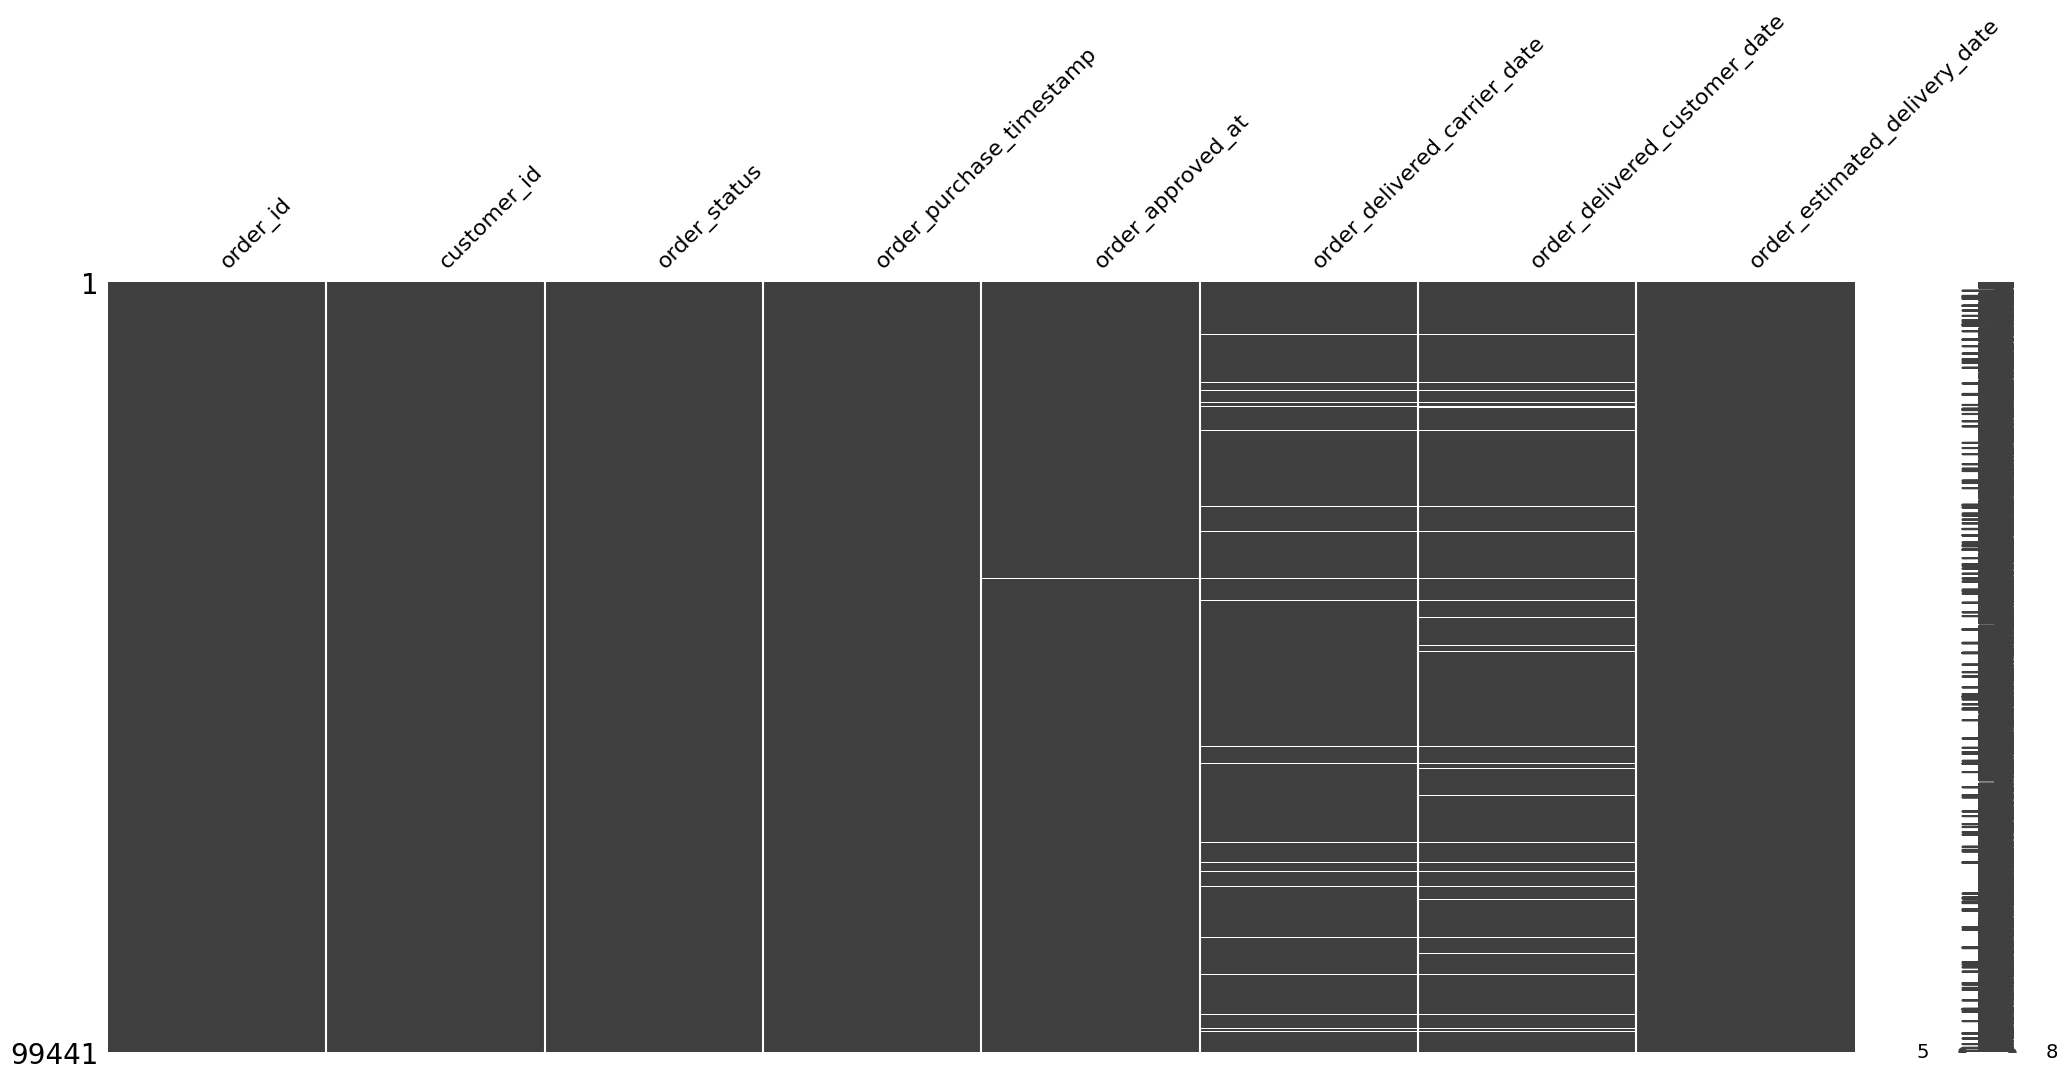


Missing value bar plot for 'orders' dataframe:


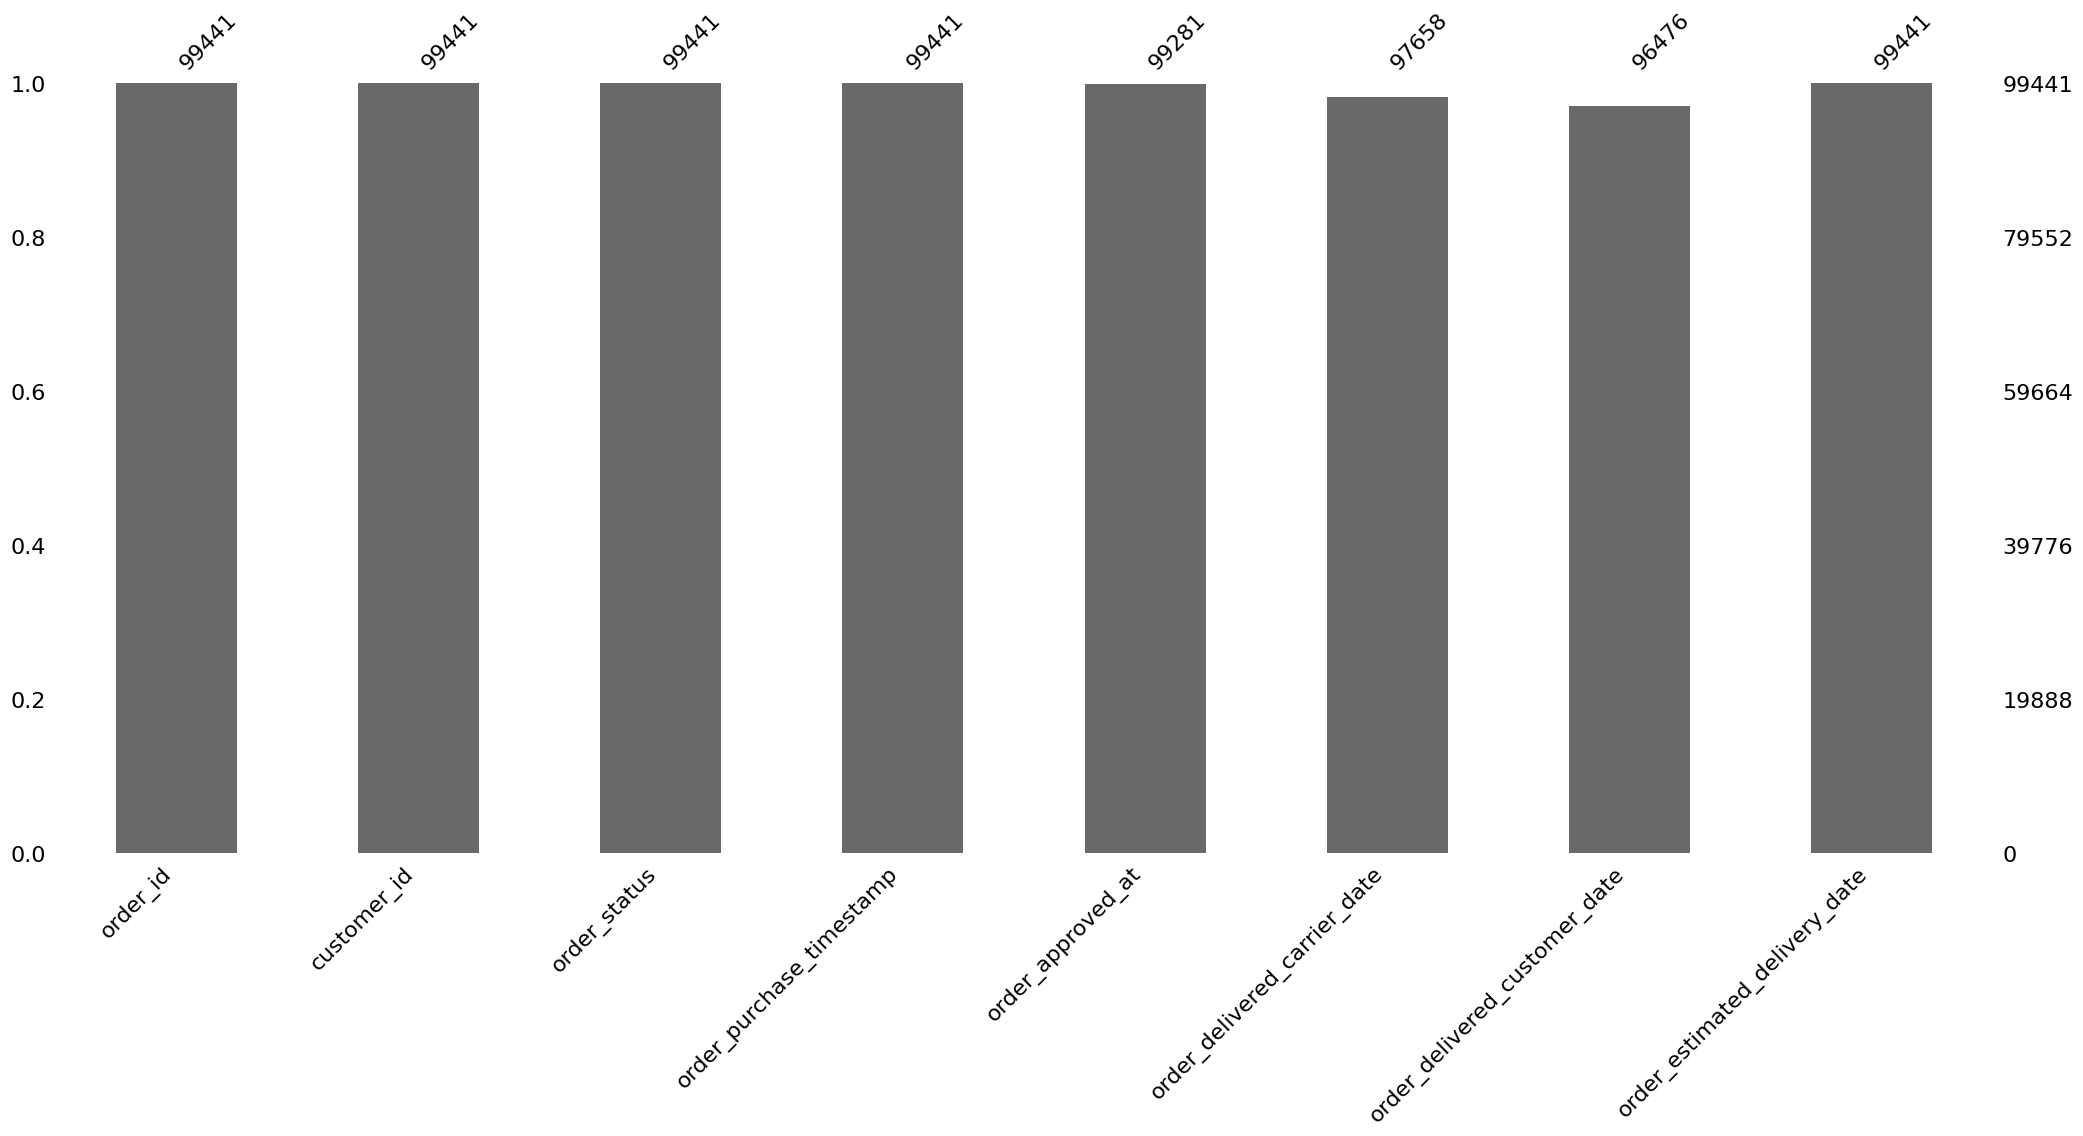


Missing value correlation heatmap for 'orders' dataframe:


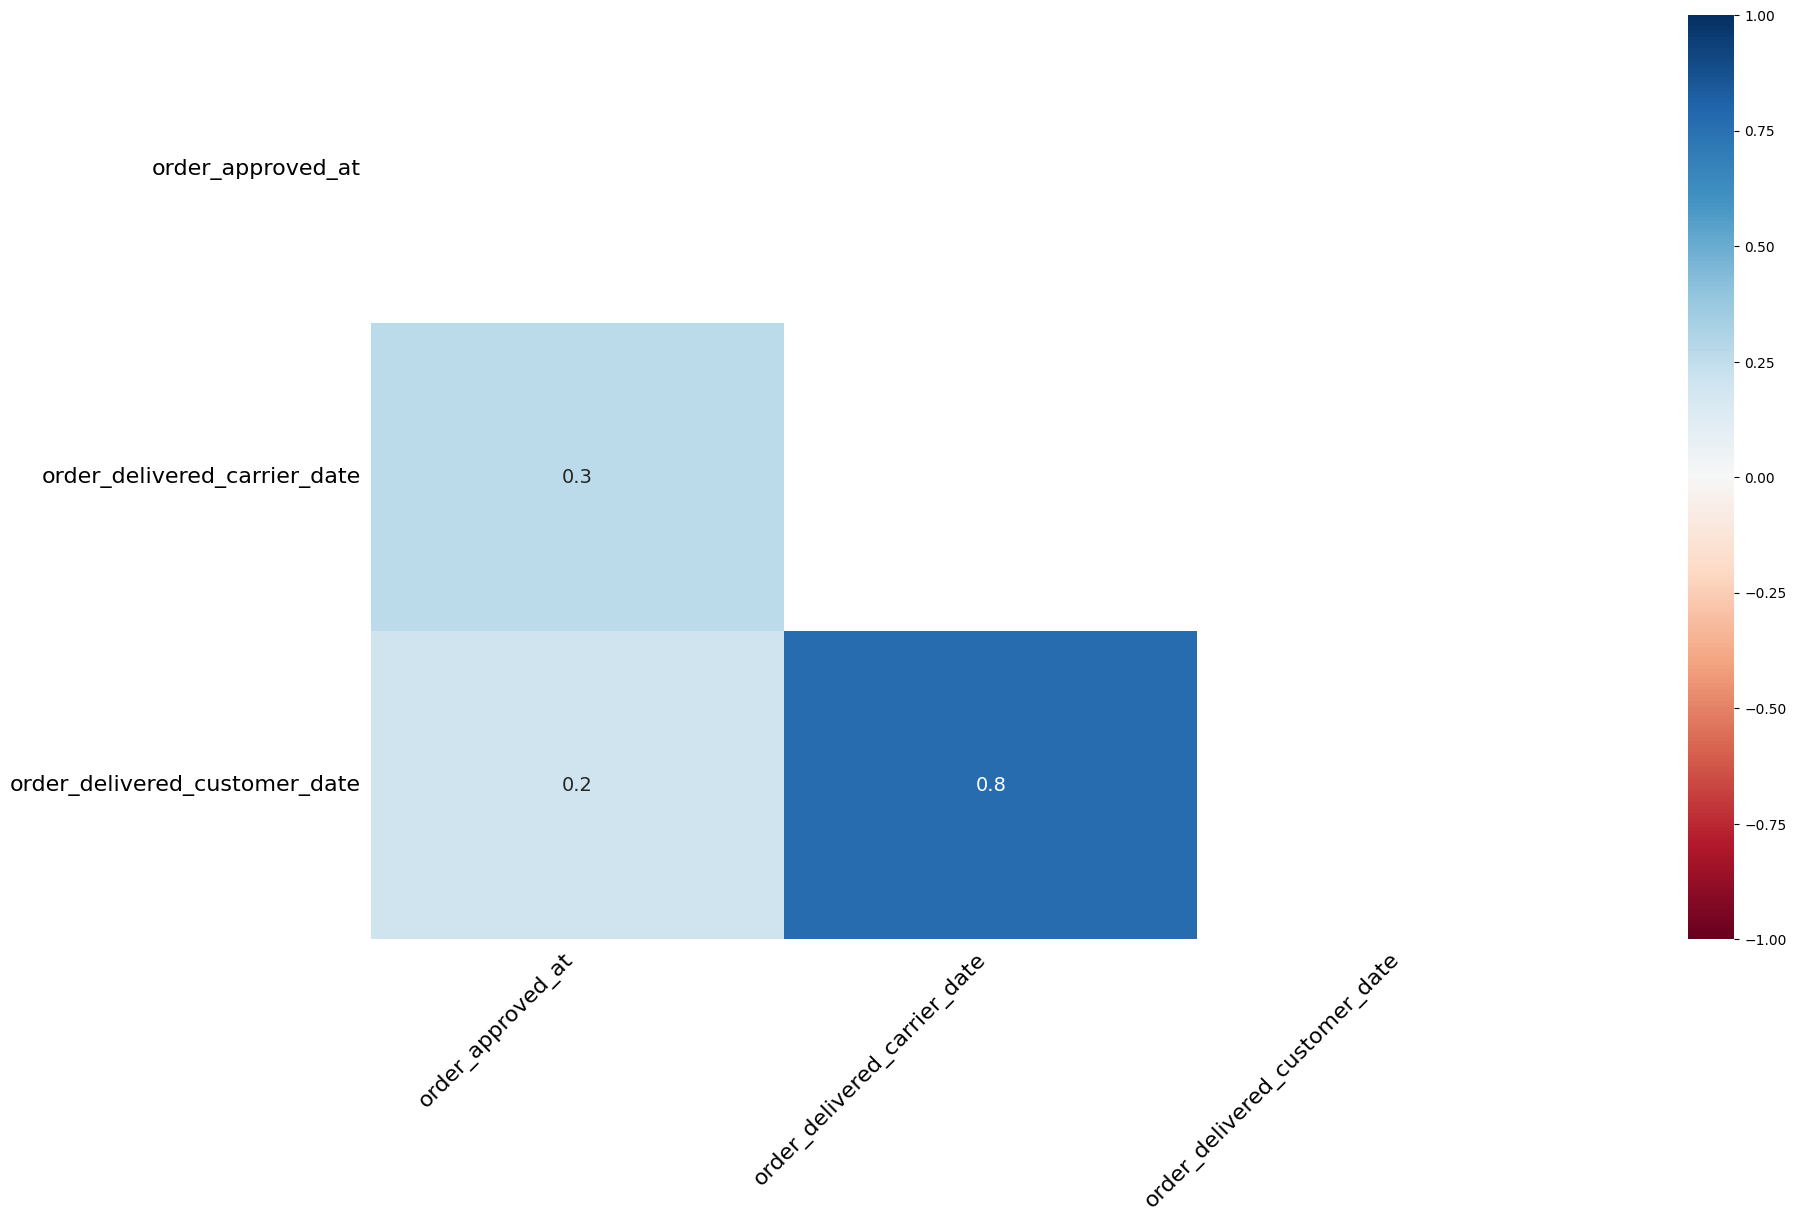


Missing value dendrogram for 'orders' dataframe:


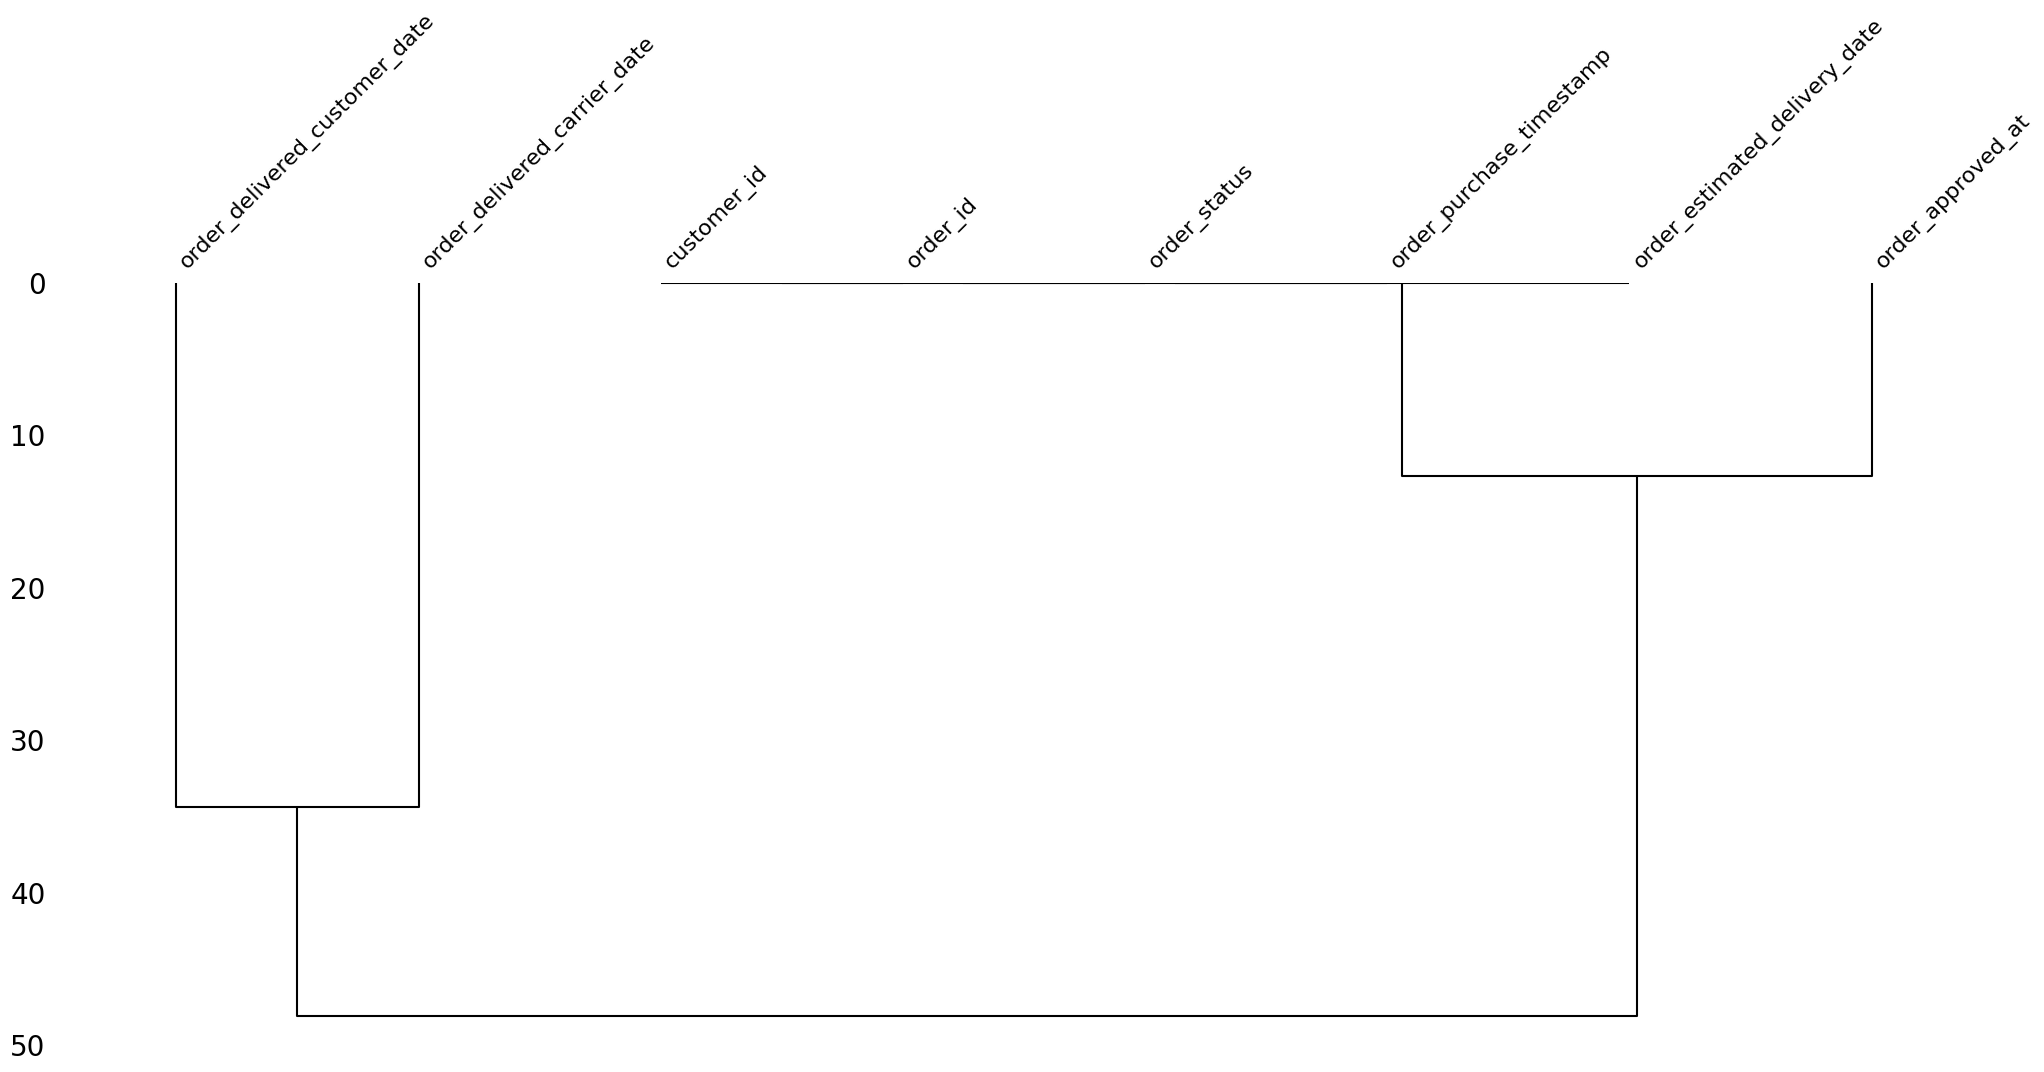

In [8]:
# prompt: In the orders dataFrame, I have missing values. It looks like the number of missing values in some columns is correlated. How can I check if the missing values form a pattern and visualize it?

!pip install missingno
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing values in the orders dataframe
print("\nMissing value matrix for 'orders' dataframe:")
msno.matrix(orders)
plt.show()

print("\nMissing value bar plot for 'orders' dataframe:")
msno.bar(orders)
plt.show()

# Check the correlation of missing values between columns
print("\nMissing value correlation heatmap for 'orders' dataframe:")
msno.heatmap(orders)
plt.show()

print("\nMissing value dendrogram for 'orders' dataframe:")
msno.dendrogram(orders)
plt.show()

## prompt:

 Can I do the same check for the missing values pattern and visualize it, this time in the products dataset?


Missing value matrix for 'products' dataframe:


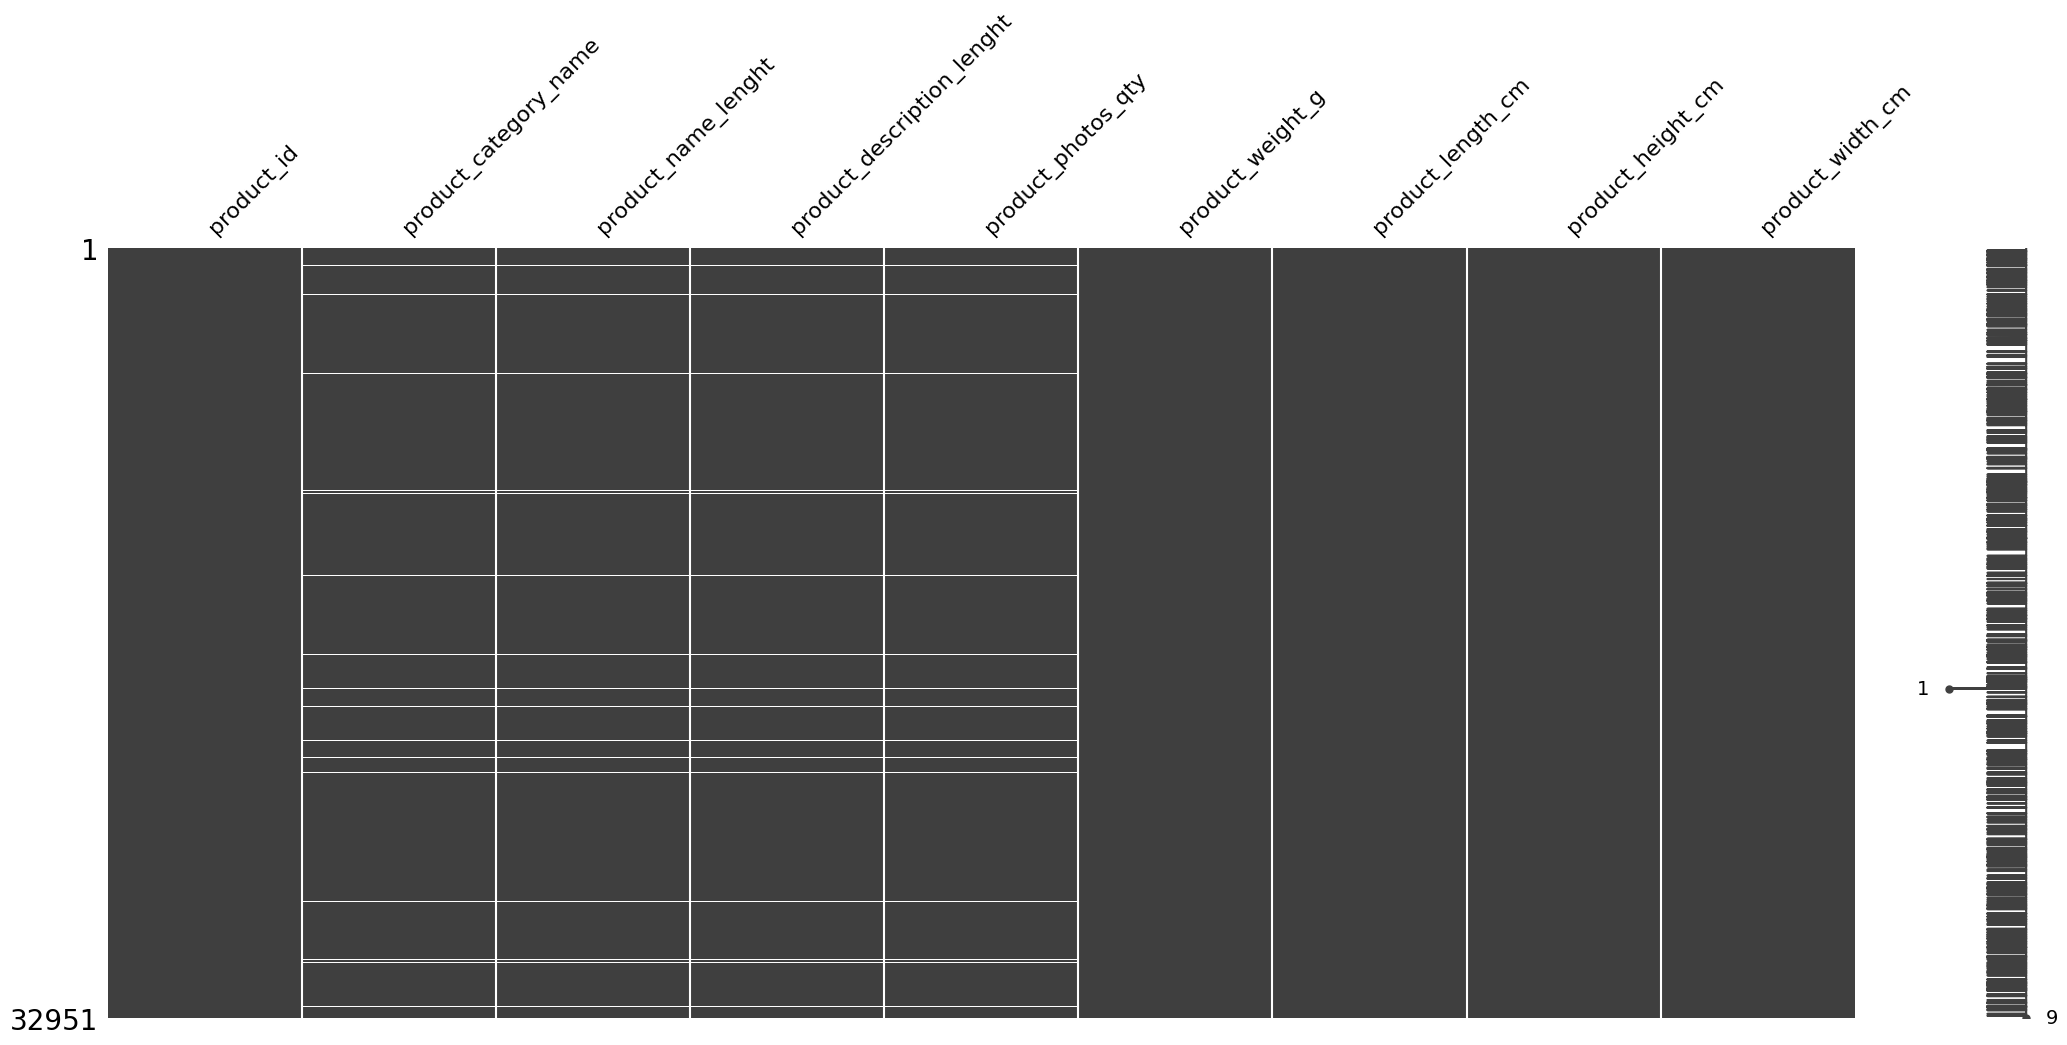


Missing value bar plot for 'products' dataframe:


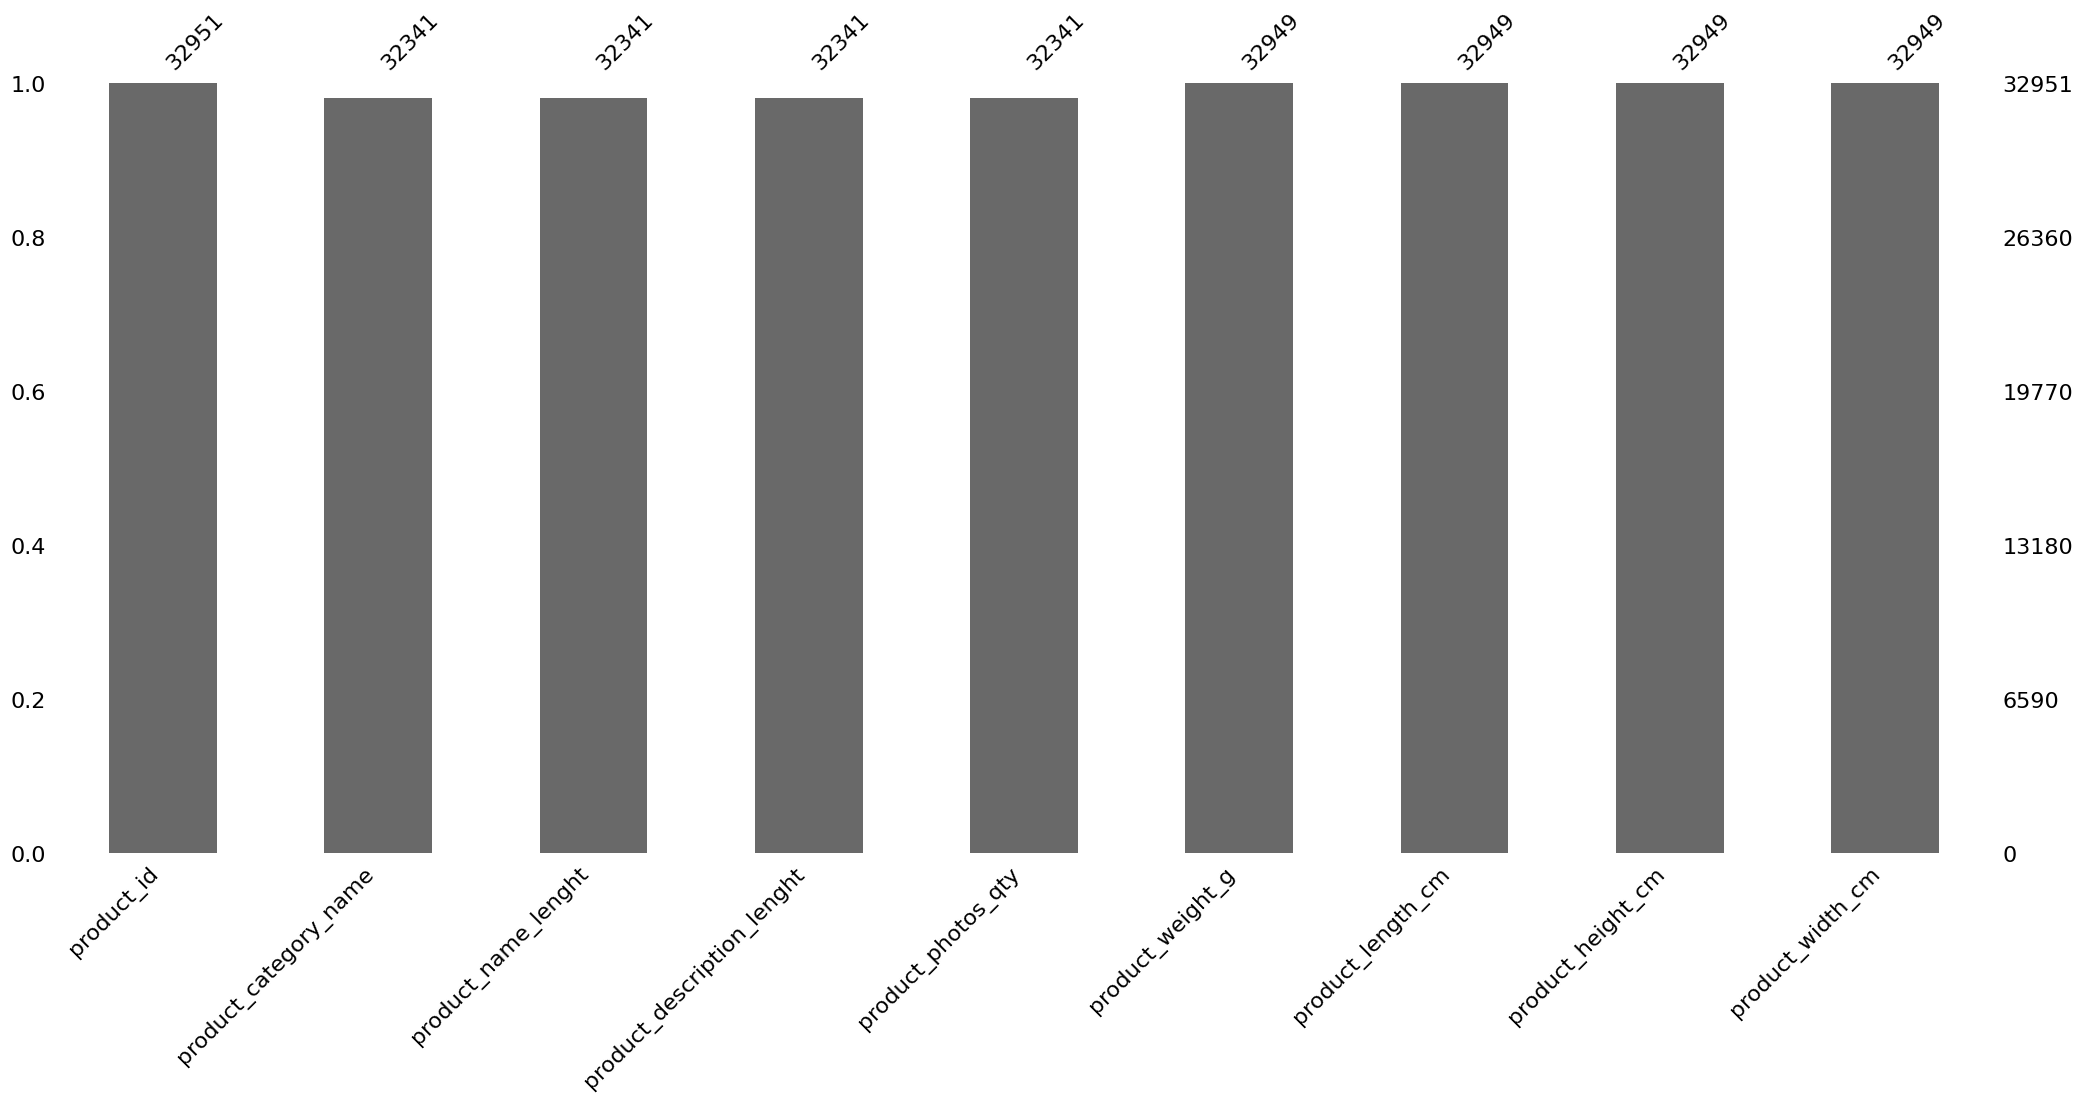


Missing value correlation heatmap for 'products' dataframe:


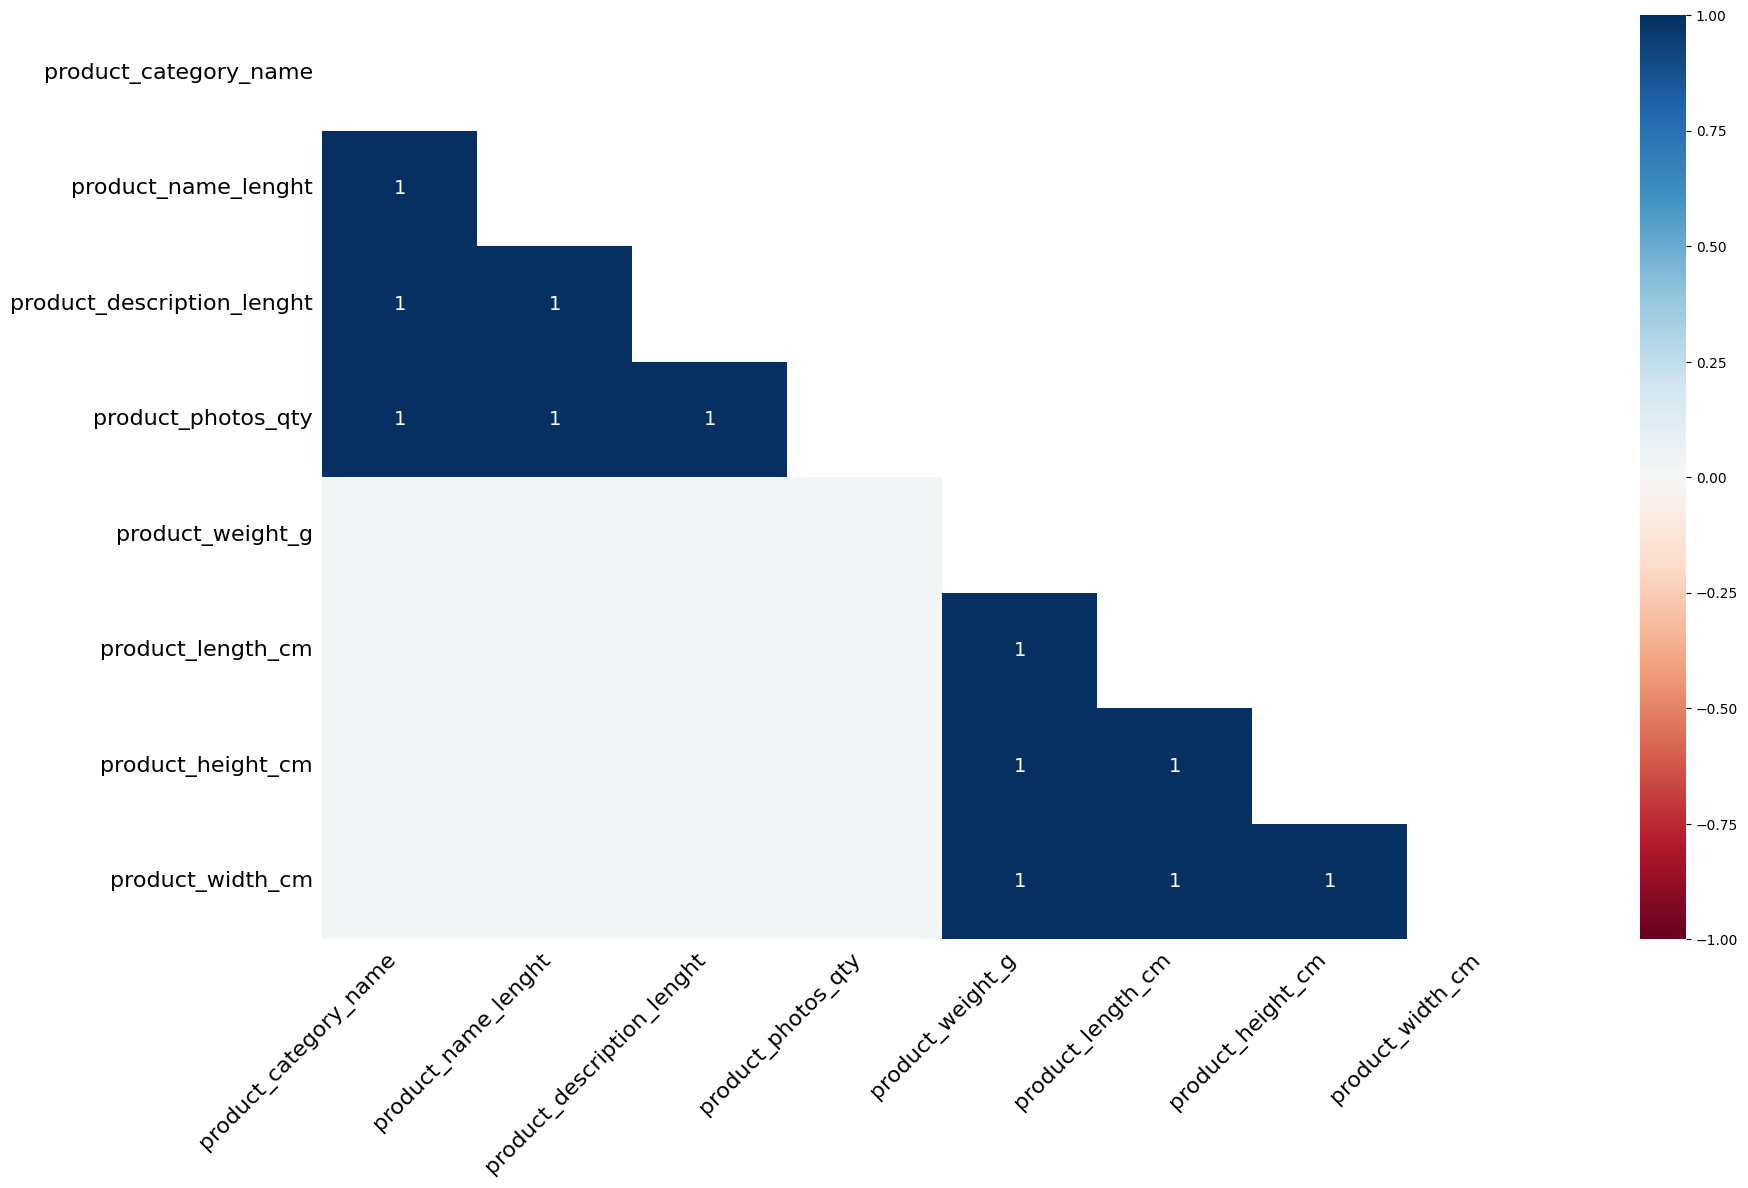


Missing value dendrogram for 'products' dataframe:


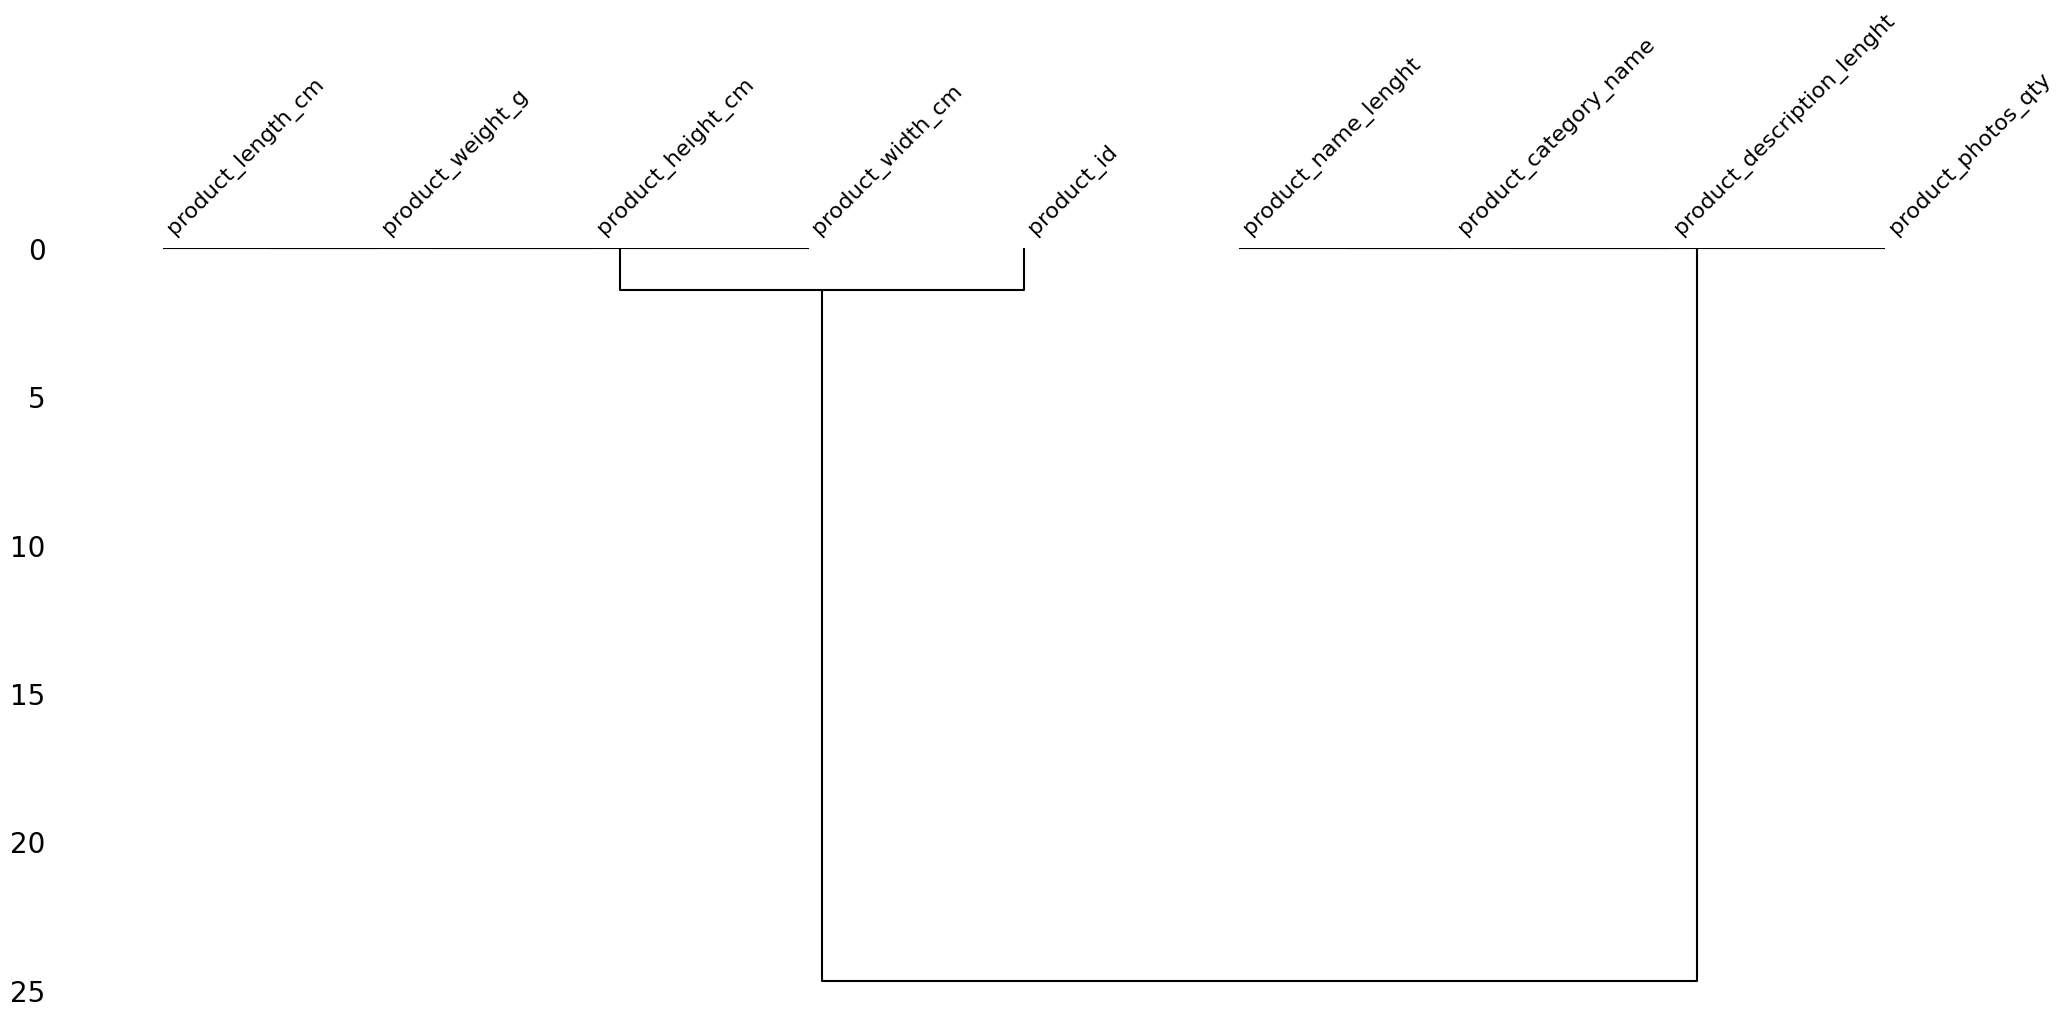

In [9]:
# prompt: Can I do the same check for the missing values pattern and visualize it, this time in the products dataset?

import matplotlib.pyplot as plt
# Visualize missing values in the products dataframe
print("\nMissing value matrix for 'products' dataframe:")
msno.matrix(products)
plt.show()

print("\nMissing value bar plot for 'products' dataframe:")
msno.bar(products)
plt.show()

# Check the correlation of missing values between columns
print("\nMissing value correlation heatmap for 'products' dataframe:")
msno.heatmap(products)
plt.show()

print("\nMissing value dendrogram for 'products' dataframe:")
msno.dendrogram(products)
plt.show()

## prompt:

Does any of the dataframes contain date or time information?

In [10]:
# prompt: Does any of the dataframes contain date or time information?

import pandas as pd
# Function to check if a DataFrame contains columns with date or time information
def contains_datetime(df, df_name):
    datetime_cols = []
    for col in df.columns:
        # Attempt to convert the column to datetime
        try:
            pd.to_datetime(df[col], errors='raise')
            datetime_cols.append(col)
        except (ValueError, TypeError):
            pass # Not a datetime column

    if datetime_cols:
        print(f"DataFrame '{df_name}' contains potential datetime columns: {datetime_cols}")
        return True
    else:
        print(f"DataFrame '{df_name}' does not appear to contain datetime columns.")
        return False

# Get all variables in the current scope
all_vars = dict(globals())

# Iterate through the variables and check for pandas DataFrames
found_datetime_df = False
for var_name, var_value in all_vars.items():
    # Check if the variable is a pandas DataFrame and its name starts with 'olist_' (after removing 'df_')
    if isinstance(var_value, pd.DataFrame) and any(var_name == file_name.replace('olist_', '').replace('_dataset.csv', '') for file_name in data_files if file_name.startswith('olist_')):
        if contains_datetime(var_value, var_name):
            found_datetime_df = True

if not found_datetime_df:
    print("\nNo DataFrame found in the current scope appears to contain date or time information.")


/tmp/ipython-input-10-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')
/tmp/ipython-input-10-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')


DataFrame 'order_payments' contains potential datetime columns: ['payment_sequential', 'payment_installments', 'payment_value']


/tmp/ipython-input-10-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')
/tmp/ipython-input-10-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')
/tmp/ipython-input-10-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')
/tmp/ipython-input-10-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, ple

DataFrame 'geolocation' contains potential datetime columns: ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']
DataFrame 'sellers' contains potential datetime columns: ['seller_zip_code_prefix']
DataFrame 'customers' contains potential datetime columns: ['customer_zip_code_prefix']


/tmp/ipython-input-10-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')
/tmp/ipython-input-10-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')
/tmp/ipython-input-10-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')
/tmp/ipython-input-10-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, ple

DataFrame 'orders' contains potential datetime columns: ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
DataFrame 'products' contains potential datetime columns: ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
DataFrame 'order_items' contains potential datetime columns: ['order_item_id', 'shipping_limit_date', 'price', 'freight_value']


/tmp/ipython-input-10-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')
/tmp/ipython-input-10-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')
/tmp/ipython-input-10-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')
/tmp/ipython-input-10-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, ple

DataFrame 'order_reviews' contains potential datetime columns: ['review_score', 'review_creation_date', 'review_answer_timestamp']


/tmp/ipython-input-10-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')


## prompt: Can I get all the column names for the datasets?

In [11]:
# prompt: Can I get all the column names for the datasets?

import pandas as pd
# Get all variables in the current scope
all_vars = dict(globals())

# Iterate through the variables and print column names for pandas DataFrames
for var_name, var_value in all_vars.items():
    # Check if the variable is a pandas DataFrame and its name starts with one of the expected names
    if isinstance(var_value, pd.DataFrame) and any(var_name == file_name.replace('olist_', '').replace('_dataset.csv', '') for file_name in data_files if file_name.startswith('olist_')):
        print(f"\nColumns for DataFrame '{var_name}':")
        print(var_value.columns.tolist())


Columns for DataFrame 'order_payments':
['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

Columns for DataFrame 'geolocation':
['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']

Columns for DataFrame 'sellers':
['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']

Columns for DataFrame 'customers':
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Columns for DataFrame 'orders':
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Columns for DataFrame 'products':
['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

Columns for DataFra

## prompt:

My next goal is to assign a customer_unique__id value with each review_id. The order_reviews dataset has a column called order_id, which I would like to use to connect it to the column with the same name in the orders dataset. Then the customer_id column in orders should be connected with the namesake column in customers.


In [12]:
# prompt: My next goal is to assign a customer_unique__id value with each review_id. The order_reviews dataset has a column called order_id, which I would like to use to connect it to the column with the same name in the orders dataset. Then the customer_id column in orders should be connected with the namesake column in customers.

import pandas as pd

# Merge order_reviews with orders to get customer_id from orders
reviews_with_customer_id = pd.merge(order_reviews, orders[['order_id', 'customer_id']], on='order_id', how='left')

# Merge the result with customers to get customer_unique_id
reviews_with_customer_id = pd.merge(reviews_with_customer_id, customers[['customer_id', 'customer_unique_id']], on='customer_id', how='left')

# Now 'reviews_with_customer_id' DataFrame contains review_id and corresponding customer_unique_id

## prompt:

Is there any review_id associated with more than one user_unique_id? Is there any review_id associated with no user_unique_id?


In [13]:
# prompt: Is there any review_id associated with more than one user_unique_id? Is there any review_id associated with no user_unique_id?

# Check if any review_id is associated with more than one user_unique_id
review_id_user_counts = reviews_with_customer_id.groupby('review_id')['customer_unique_id'].nunique()
reviews_with_multiple_users = review_id_user_counts[review_id_user_counts > 1]

if not reviews_with_multiple_users.empty:
    print("\nReview IDs associated with more than one unique user:")
    print(reviews_with_multiple_users)
else:
    print("\nNo review ID is associated with more than one unique user.")

# Check if any review_id is associated with no user_unique_id (missing values)
reviews_with_no_user = reviews_with_customer_id[reviews_with_customer_id['customer_unique_id'].isnull()]['review_id'].unique()

if len(reviews_with_no_user) > 0:
    print(f"\nNumber of review IDs associated with no unique user: {len(reviews_with_no_user)}")
    # print("Review IDs associated with no unique user:")
    # print(reviews_with_no_user) # Uncomment to print all such review_ids
else:
    print("\nNo review ID is associated with no unique user.")


No review ID is associated with more than one unique user.

No review ID is associated with no unique user.


## prompt:

What are the columns of the resulting dataset?


In [14]:
# prompt: What are the columns of the resulting dataset?

print("\nColumns of the resulting dataset:")
print(reviews_with_customer_id.columns.tolist())


Columns of the resulting dataset:
['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'customer_id', 'customer_unique_id']


## prompt:

Can we repeat the merge but this time keeping all the columns in the orders dataset?

In [15]:
# prompt: Can we repeat the merge but this time keeping all the columns in the orders dataset?

import pandas as pd
# Merge order_reviews with orders, keeping all columns from orders
reviews_with_customer_id = pd.merge(order_reviews, orders, on='order_id', how='left')

# Merge the result with customers to get customer_unique_id
reviews_with_customer_id = pd.merge(reviews_with_customer_id, customers[['customer_id', 'customer_unique_id']], on='customer_id', how='left')

# Now 'reviews_with_customer_id' DataFrame contains all columns from orders and customer_unique_id
print("\nColumns of the resulting dataset after merging all columns from orders:")
print(reviews_with_customer_id.columns.tolist())


Columns of the resulting dataset after merging all columns from orders:
['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_unique_id']


## prompt:

Ok, next I would like to bring in the payment_value  information from order_payments


In [16]:
# prompt: Ok, next I would like to bring in the payment_value  information from order_payments

import pandas as pd
# Merge the current result with order_payments to bring in payment_value
reviews_with_customer_id = pd.merge(reviews_with_customer_id, order_payments[['order_id', 'payment_value']], on='order_id', how='left')

print("\nColumns of the resulting dataset after adding payment_value:")
print(reviews_with_customer_id.columns.tolist())


Columns of the resulting dataset after adding payment_value:
['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_unique_id', 'payment_value']


# prompt:

Can I get information about the order_purchase_timestamp variable in this dataset?


In [17]:
# prompt: Can I get information about the order_purchase_timestamp variable in this dataset?

import pandas as pd
print("\nInformation about 'order_purchase_timestamp' column in the 'orders' dataframe:")
print(orders['order_purchase_timestamp'].info())

# Also show descriptive statistics (useful if it's an object or datetime type)
if pd.api.types.is_datetime64_any_dtype(orders['order_purchase_timestamp']):
    print("\nDescriptive statistics for 'order_purchase_timestamp':")
    print(orders['order_purchase_timestamp'].describe(datetime_is_numeric=True))
elif pd.api.types.is_object_dtype(orders['order_purchase_timestamp']):
     print("\nDescriptive statistics for 'order_purchase_timestamp' (as object):")
     print(orders['order_purchase_timestamp'].describe())

# Check the first few values to see the format
print("\nFirst 5 values of 'order_purchase_timestamp':")
print(orders['order_purchase_timestamp'].head())


Information about 'order_purchase_timestamp' column in the 'orders' dataframe:
<class 'pandas.core.series.Series'>
RangeIndex: 99441 entries, 0 to 99440
Series name: order_purchase_timestamp
Non-Null Count  Dtype 
--------------  ----- 
99441 non-null  object
dtypes: object(1)
memory usage: 777.0+ KB
None

Descriptive statistics for 'order_purchase_timestamp' (as object):
count                   99441
unique                  98875
top       2018-08-02 12:06:07
freq                        3
Name: order_purchase_timestamp, dtype: object

First 5 values of 'order_purchase_timestamp':
0    2017-10-02 10:56:33
1    2018-07-24 20:41:37
2    2018-08-08 08:38:49
3    2017-11-18 19:28:06
4    2018-02-13 21:18:39
Name: order_purchase_timestamp, dtype: object


# prompt:

Can we convert that variable in the original dataset to a proper date and time type of variable?


In [18]:
# prompt: Can we convert that variable in the original dataset to a proper date and time type of variable?

import pandas as pd
# Convert 'order_purchase_timestamp' to datetime objects
reviews_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(reviews_with_customer_id['order_purchase_timestamp'])

print("\nInformation about 'order_purchase_timestamp' column after conversion:")
print(reviews_with_customer_id['order_purchase_timestamp'].info())

print("\nFirst 5 values of 'order_purchase_timestamp' after conversion:")
print(reviews_with_customer_id['order_purchase_timestamp'].head())


Information about 'order_purchase_timestamp' column after conversion:
<class 'pandas.core.series.Series'>
RangeIndex: 103678 entries, 0 to 103677
Series name: order_purchase_timestamp
Non-Null Count   Dtype         
--------------   -----         
103678 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 810.1 KB
None

First 5 values of 'order_purchase_timestamp' after conversion:
0   2018-01-11 15:30:49
1   2018-02-28 12:25:19
2   2018-02-03 09:56:22
3   2017-04-09 17:41:13
4   2018-02-10 10:59:03
Name: order_purchase_timestamp, dtype: datetime64[ns]


## prompt:

How many weeks does the order_purchase_timestamp span?

In [19]:
# prompt: How many weeks does the order_purchase_timestamp span?

# Calculate the difference between the maximum and minimum timestamps
time_span = reviews_with_customer_id['order_purchase_timestamp'].max() - reviews_with_customer_id['order_purchase_timestamp'].min()

# Convert the time difference to weeks
weeks_span = time_span.days / 7

print(f"\nThe order_purchase_timestamp spans approximately {weeks_span:.2f} weeks.")


The order_purchase_timestamp spans approximately 110.29 weeks.


## prompt:

Can we see a time series plot of the aggregated total value of payment_value per week?


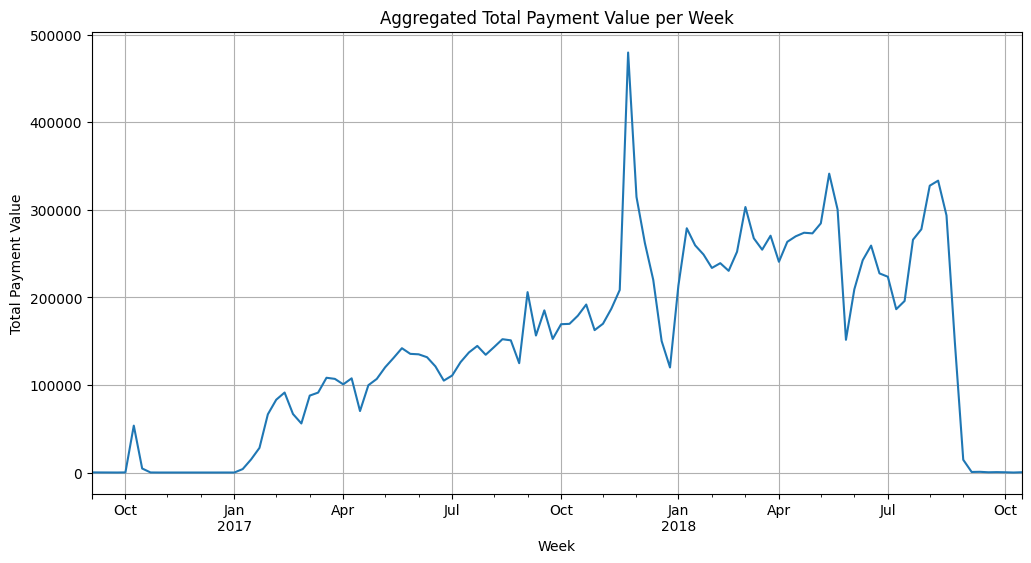

In [20]:
# prompt: Can we see a time series plot of the aggregated total value of payment_value per week?

import matplotlib.pyplot as plt
# Set the index to the timestamp column
reviews_with_customer_id = reviews_with_customer_id.set_index('order_purchase_timestamp')

# Resample the data weekly and sum the payment_value
weekly_payment_value = reviews_with_customer_id['payment_value'].resample('W').sum()

# Plot the time series
plt.figure(figsize=(12, 6))
weekly_payment_value.plot()
plt.title('Aggregated Total Payment Value per Week')
plt.xlabel('Week')
plt.ylabel('Total Payment Value')
plt.grid(True)
plt.show()

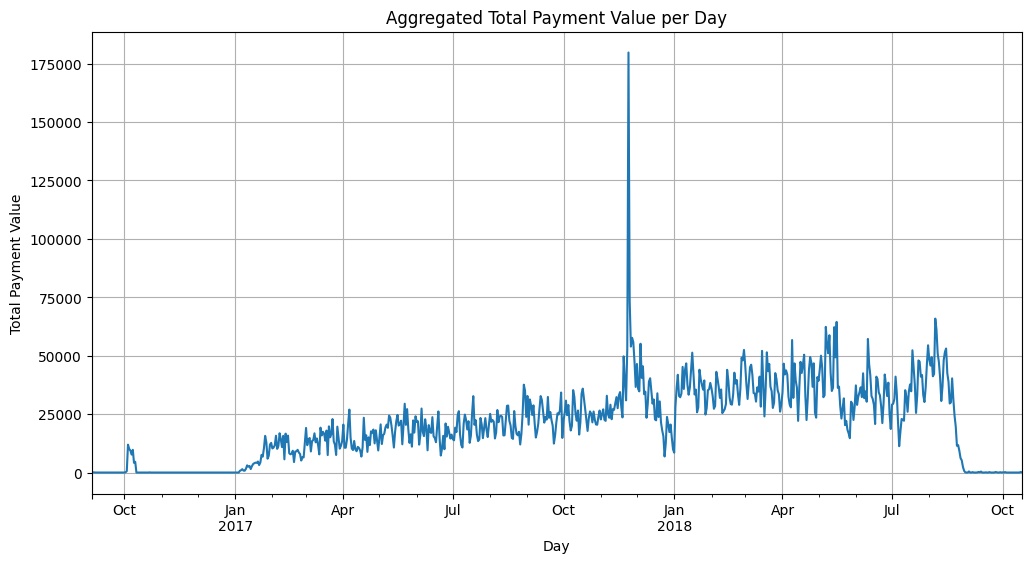

In [21]:
# prompt: Can you do the same but using daily data instead of weekly data?

import matplotlib.pyplot as plt
# Resample the data daily and sum the payment_value
daily_payment_value = reviews_with_customer_id['payment_value'].resample('D').sum()

# Plot the time series
plt.figure(figsize=(12, 6))
daily_payment_value.plot()
plt.title('Aggregated Total Payment Value per Day')
plt.xlabel('Day')
plt.ylabel('Total Payment Value')
plt.grid(True)
plt.show()

## prompt:

How could I detect seasonality in the daily series?


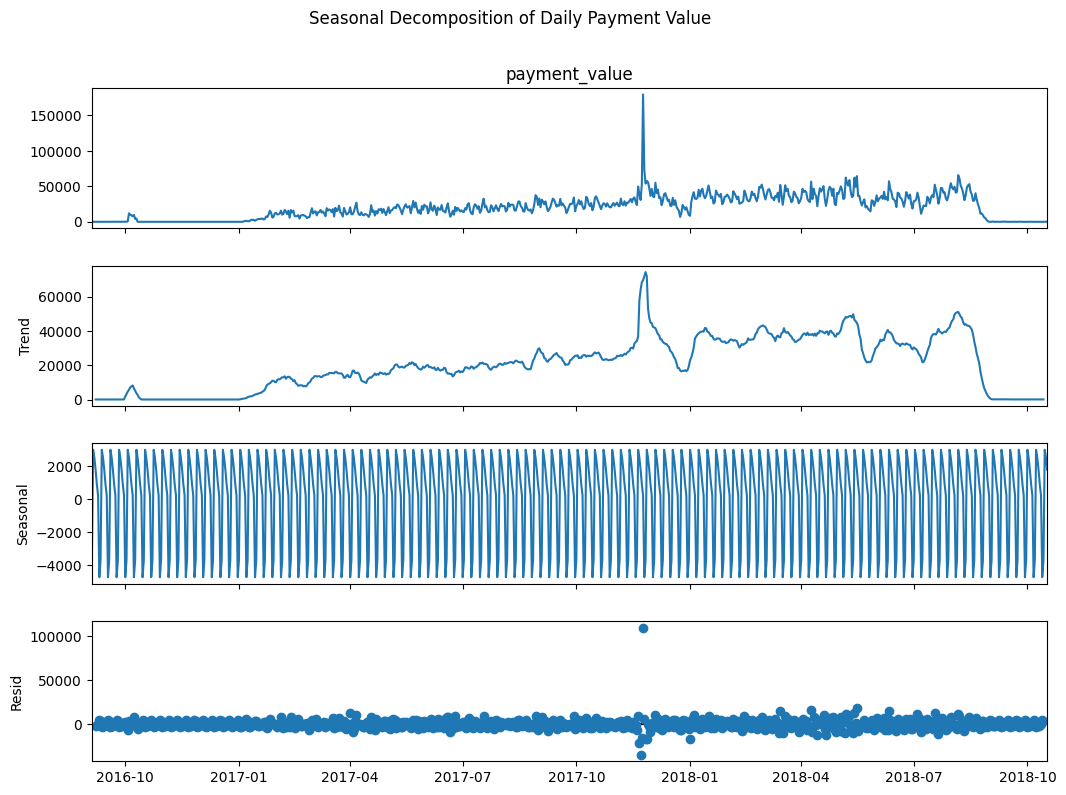

<Figure size 1200x600 with 0 Axes>

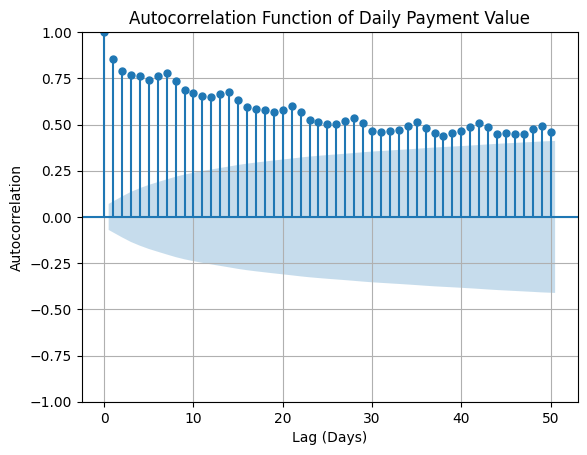

In [22]:
# prompt: How could I detect seasonality in the daily series?

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

# Perform seasonal decomposition on the daily data
decomposition = seasonal_decompose(daily_payment_value, model='additive', period=7) # Assuming weekly seasonality (7 days)

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Seasonal Decomposition of Daily Payment Value', y=1.02)
plt.show()

# Plot the Autocorrelation Function (ACF)
plt.figure(figsize=(12, 6))
plot_acf(daily_payment_value.dropna(), lags=50) # Plotting for up to 50 lags
plt.title('Autocorrelation Function of Daily Payment Value')
plt.xlabel('Lag (Days)')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


**User:**.
In the last plot, of the ACF function, is there any hint of seasonality? Which frequency?

**Gemini:**.
Looking at the Autocorrelation Function (ACF) plot, we can indeed see hints of seasonality. The plot shows significant spikes at lags that are multiples of 7. This suggests a weekly seasonality, meaning the daily payment values tend to be correlated with the values from the same day in the previous week. The strongest correlation appears to be at a lag of 7 days.

## prompt:

I would like to fit a seasonal ARIMA model to this series. Please do not use AutoARIMA, try to find the model structure by examining the ACF and PACF of the series.


<Figure size 1200x600 with 0 Axes>

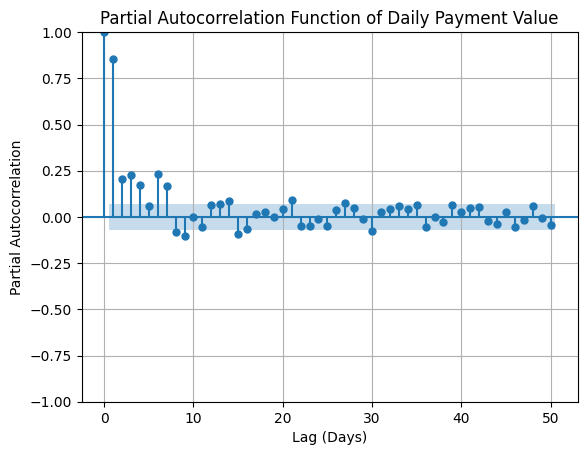

                                    SARIMAX Results                                    
Dep. Variable:                   payment_value   No. Observations:                  774
Model:             ARIMA(1, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -7993.088
Date:                         Thu, 03 Jul 2025   AIC                          15996.176
Time:                                 07:44:44   BIC                          16019.427
Sample:                             09-04-2016   HQIC                         16005.123
                                  - 10-17-2018                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2588      0.038      6.777      0.000       0.184       0.334
ma.L1         -0.7515      0.032    -23.178      0.000     

In [23]:
# prompt: I would like to fit a seasonal ARIMA model to this series. Please do not use AutoARIMA, try to find the model structure by examining the ACF and PACF of the series.

import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf

# Plot the Partial Autocorrelation Function (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(daily_payment_value.dropna(), lags=50) # Plotting for up to 50 lags
plt.title('Partial Autocorrelation Function of Daily Payment Value')
plt.xlabel('Lag (Days)')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

# Based on the ACF and PACF:
# ACF shows significant spikes at multiples of 7, suggesting a seasonal component (S=7).
# The slow decay in the ACF suggests differencing might be needed for stationarity.
# The PACF helps in identifying the order of the non-seasonal AR component and seasonal AR component.

# Let's try a seasonal ARIMA model. We'll start with some initial guesses based on the plots.
# Non-seasonal part:
# PACF has significant spikes at early lags, suggesting a possible AR(p) component. Let's start by assuming p=1 or p=2.
# ACF decays slowly, suggesting differencing d=1 might be necessary.
# ACF has significant spikes at early lags, suggesting a possible MA(q) component. Let's start by assuming q=1 or q=2.

# Seasonal part (S=7):
# ACF has spikes at lag 7 and its multiples, suggesting a seasonal MA(Q) component. Let's start by assuming Q=1.
# PACF also has spikes at lag 7, suggesting a seasonal AR(P) component. Let's start by assuming P=1.
# Seasonal differencing (D) might be needed if the seasonal pattern is not stationary.

# Let's start with a simple model: ARIMA(p, d, q)x(P, D, Q, S)
# Try ARIMA(1, 1, 1)x(1, 0, 1, 7) as a starting point
model = ARIMA(daily_payment_value.dropna(), order=(1, 1, 1), seasonal_order=(1, 0, 1, 7))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# prompt:

Can you make diagnostic plots of the residuals for this model?


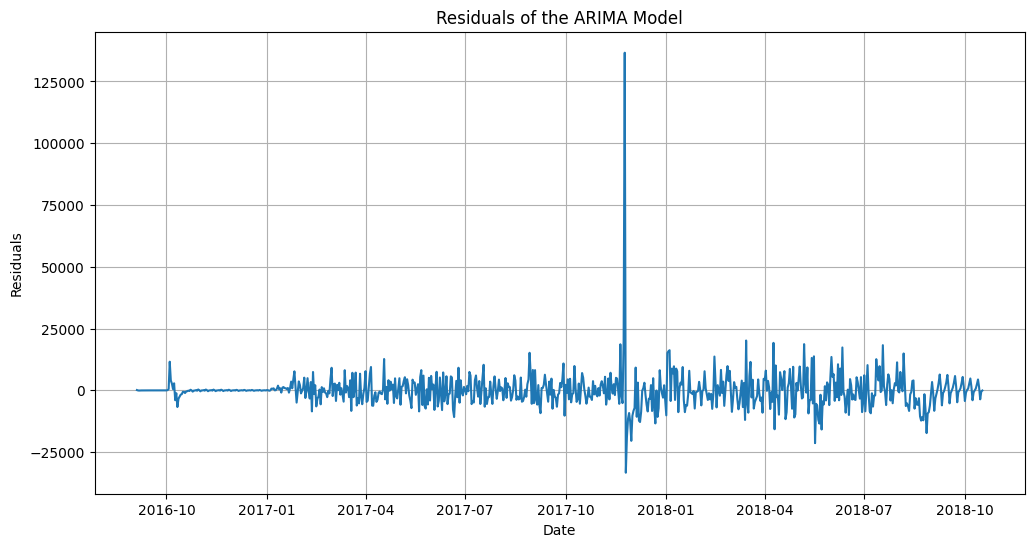

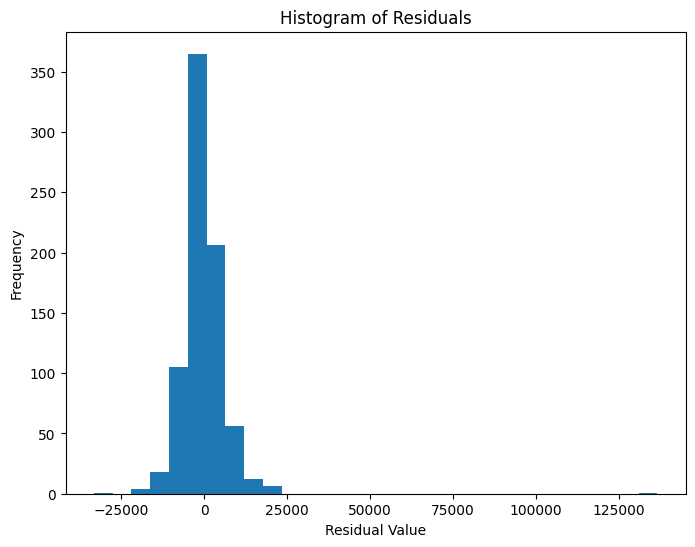

<Figure size 800x600 with 0 Axes>

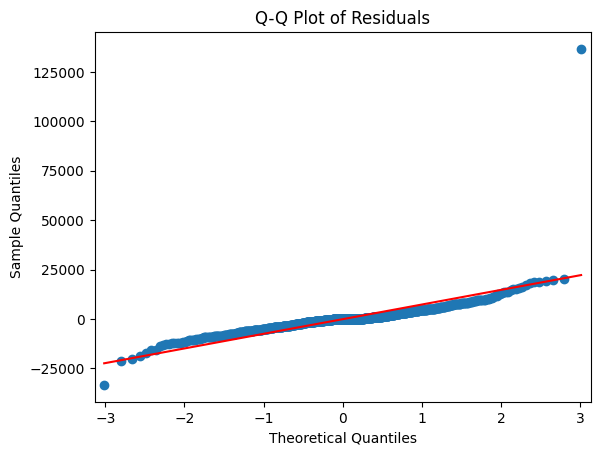

<Figure size 1200x600 with 0 Axes>

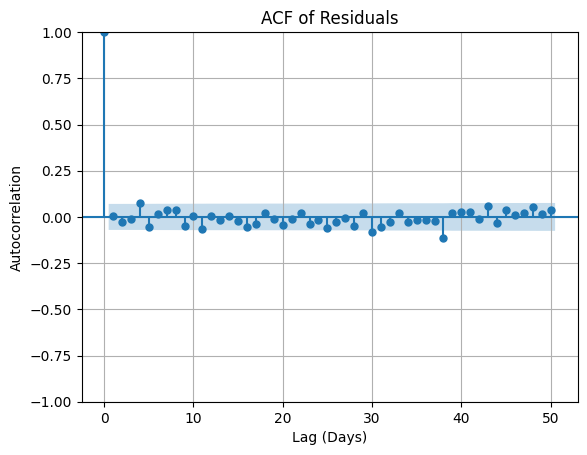

<Figure size 1200x600 with 0 Axes>

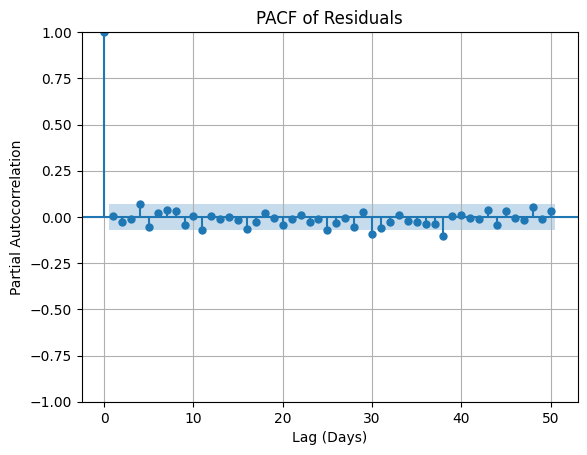

In [24]:
# prompt: Can you make diagnostic plots of the residuals for this model?

import matplotlib.pyplot as plt
# Get the residuals from the model fit
residuals = model_fit.resid

# Plot the residuals over time
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of the ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Plot a histogram of the residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

# Plot a Q-Q plot of the residuals
import statsmodels.api as sm
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s') # 's' for standardized line
plt.title('Q-Q Plot of Residuals')
plt.show()

# Plot the Autocorrelation Function (ACF) of the residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=50)
plt.title('ACF of Residuals')
plt.xlabel('Lag (Days)')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Plot the Partial Autocorrelation Function (PACF) of the residuals
plt.figure(figsize=(12, 6))
plot_pacf(residuals, lags=50)
plt.title('PACF of Residuals')
plt.xlabel('Lag (Days)')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

## prompt:

I would like to conduct a Ljung-Box test to see if those residuals qualify as white noise


In [25]:
# prompt: I would like to conduct a Ljung-Box test to see if those residuals qualify as white noise

# Perform Ljung-Box test on the residuals
# The Ljung-Box test checks if a series is white noise.
# Null hypothesis: The data are independently distributed (i.e. the series is white noise).
# Alternative hypothesis: The data are not independently distributed.

# Let's test the residuals for up to 10 lags (arbitrary, can be adjusted)
# We'll use the `acorr_ljungbox` function from statsmodels
from statsmodels.stats.diagnostic import acorr_ljungbox

# The function returns two values: the Ljung-Box statistic and the p-value.
# We need to handle potential NaNs in the residuals if they exist
residuals_clean = residuals.dropna()

ljung_box_results = acorr_ljungbox(residuals_clean, lags=[10], return_df=True)

print("\nLjung-Box Test Results for Residuals:")
ljung_box_results

# Interpretation:
# If the p-value is less than a chosen significance level (e.g., 0.05), we reject the null hypothesis
# and conclude that the residuals are not white noise.
# If the p-value is greater than the significance level, we fail to reject the null hypothesis,
# suggesting that the residuals are not significantly different from white noise.


Ljung-Box Test Results for Residuals:


,lb_stat,lb_pvalue
10,11.816651,0.297515


**User**.  
You used 10 lags for the Ljung-Box test. What is the rationale behind the choice of a number of lags for this test?

**Gemini**.
That's a great question! The choice of the number of lags for the Ljung-Box test is somewhat arbitrary and there's no single "correct" number. However, there are some common practices and considerations:

+ Expected Seasonality: If you suspect a specific seasonality (like weekly or monthly), you might choose lags that are multiples of that frequency to see if those correlations are significant.  
+ Data Frequency: For daily data, testing lags up to a few weeks (like 10, 14, or 20) is common to capture potential weekly patterns and short-term dependencies.  
+ Sample Size: The number of lags should generally be less than a certain proportion of the sample size (e.g., typically less than N/4 or N/log(N), where N is the number of observations) to ensure the test is statistically valid.  
+ Purpose of the Test: If you're using the test to check if residuals from a time series model are white noise, you might choose lags that correspond to the orders of the model you fitted (e.g., if you fitted an ARIMA(p, d, q)x(P, D, Q, S) model, you might check lags up to S or a bit beyond).  

In the case of the daily payment data and the initial ARIMA model, choosing 10 lags was a reasonable starting point to check for remaining short-term autocorrelation and to see if the weekly seasonality (at lag 7) was adequately captured by the model. It's often a good practice to perform the Ljung-Box test with a few different numbers of lags to get a more comprehensive picture of the residual autocorrelation.

## prompt:

There is an obvious outlier in the time series. Can you help me find the date when it happened?


In [27]:
# prompt: There is an obvious outlier in the time series. Can you help me find the date when it happened?

# Find the date of the maximum value in the daily time series
outlier_date = daily_payment_value.idxmax()

print(f"\nThe date of the obvious outlier is: {outlier_date}")


The date of the obvious outlier is: 2017-11-24 00:00:00


**User:**  
Is there any reason why 2017-11-24 should be an outlier for e-commerce data in Brazil?  

**Gemini:**  
The date 2017-11-24 stands out as an outlier in the daily payment value series. A very likely reason for this spike in e-commerce activity in Brazil is Black Friday. In 2017, Black Friday fell on precisely November 24th. This global sales event is a major driver of online purchases, and it's common to see a significant surge in transaction volume and value on this day.

## prompt:

What is the distribution of review scores across different product categories?


Distribution of Review Scores Across Different Product Categories:
                            count      mean       std  min  25%  50%  75%  max
product_category_name                                                         
agro_industria_e_comercio   182.0  4.021978  1.325300  1.0  4.0  5.0  5.0  5.0
alimentos                   435.0  4.285057  1.231923  1.0  4.0  5.0  5.0  5.0
alimentos_bebidas           220.0  4.381818  1.037927  1.0  4.0  5.0  5.0  5.0
artes                       195.0  4.066667  1.351085  1.0  4.0  5.0  5.0  5.0
artes_e_artesanato           22.0  4.136364  1.424127  1.0  4.0  5.0  5.0  5.0
...                           ...       ...       ...  ...  ...  ...  ...  ...
sinalizacao_e_seguranca     137.0  4.102190  1.290717  1.0  4.0  5.0  5.0  5.0
tablets_impressao_imagem     75.0  4.173333  1.155169  1.0  4.0  5.0  5.0  5.0
telefonia                  4147.0  4.007475  1.349882  1.0  3.0  5.0  5.0  5.0
telefonia_fixa              215.0  3.902326  1.451633  1.0  3.0

<Figure size 1500x800 with 0 Axes>

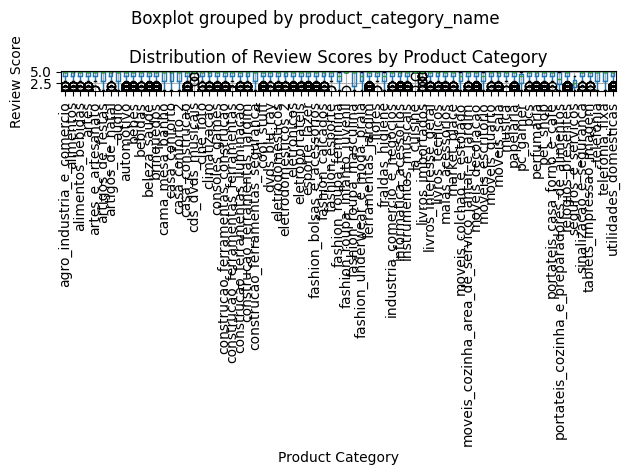

In [28]:
# prompt: What is the distribution of review scores across different product categories?

import pandas as pd
import matplotlib.pyplot as plt
# Assuming 'order_items' and 'products' dataframes are loaded

# Merge order_items with products to get product category information
items_with_category = pd.merge(order_items, products[['product_id', 'product_category_name']], on='product_id', how='left')

# Merge the result with the combined reviews/orders/customers/payments dataframe
# We need to link by order_id
reviews_with_category_and_score = pd.merge(reviews_with_customer_id, items_with_category[['order_id', 'product_category_name']], on='order_id', how='left')

# Drop duplicate rows that might have been introduced by multiple items in an order
reviews_with_category_and_score = reviews_with_category_and_score.drop_duplicates(subset=['review_id'])

# Analyze the distribution of review scores per product category
# Group by product category and get descriptive statistics of review_score
review_score_distribution = reviews_with_category_and_score.groupby('product_category_name')['review_score'].describe()

print("\nDistribution of Review Scores Across Different Product Categories:")
print(review_score_distribution)

# You can also visualize this distribution
plt.figure(figsize=(15, 8))
reviews_with_category_and_score.boxplot(column='review_score', by='product_category_name')
plt.title('Distribution of Review Scores by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Review Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# prompt:

There are too many categories and the boxplots are too small to be informative. Can we group the categories into higher leve categories according to types of products?



Distribution of Review Scores Across Different Product Category Groups:
                            count      mean       std  min  25%  50%  75%  max
product_category_group                                                        
Books & Media                58.0  4.086207  1.454388  1.0  4.0  5.0  5.0  5.0
Electronics & Appliances   1390.0  4.015827  1.386880  1.0  3.0  5.0  5.0  5.0
Home & Garden                11.0  4.545455  1.213560  1.0  5.0  5.0  5.0  5.0
Other                     95258.0  4.087058  1.346696  1.0  4.0  5.0  5.0  5.0
Pet Supplies               1693.0  4.243946  1.242055  1.0  4.0  5.0  5.0  5.0


<Figure size 1500x800 with 0 Axes>

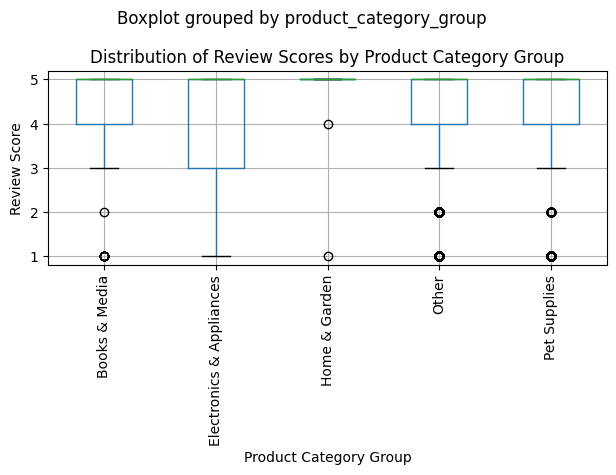

In [29]:

import matplotlib.pyplot as plt
# A dictionary to map original categories to higher-level groups
category_mapping = {
    'agro_industry_and_commerce': 'Business & Industrial',
    'air_conditioning': 'Electronics & Appliances',
    'art': 'Arts & Entertainment',
    'arts_and_craftmanship': 'Arts & Entertainment',
    'audio': 'Electronics & Appliances',
    'auto': 'Automotive',
    'baby': 'Baby',
    'bed_bath_table': 'Home & Garden',
    'books_general_interest': 'Books & Media',
    'books_technical': 'Books & Media',
    'bottles_and_drogary': 'Health & Beauty',
    'christmas_supplies': 'Seasonal',
    'cine_photo': 'Electronics & Appliances',
    'computers': 'Electronics & Appliances',
    'computers_accessories': 'Electronics & Appliances',
    'consoles_games': 'Electronics & Appliances',
    'construction_tools_furniture': 'Home & Garden',
    'construction_tools_lights': 'Home & Garden',
    'construction_tools_safety': 'Home & Garden',
    'cool_stuff': 'Other',
    'costumes': 'Apparel & Accessories',
    'cuisine': 'Home & Garden',
    'diapers_and_wipes': 'Baby',
    'dvds_blu_ray': 'Books & Media',
    'electronics': 'Electronics & Appliances',
    'entertainment': 'Arts & Entertainment',
    'fashio_female_clothing': 'Apparel & Accessories',
    'fashion_bags_accessories': 'Apparel & Accessories',
    'fashion_childrens_clothes': 'Apparel & Accessories',
    'fashion_male_clothing': 'Apparel & Accessories',
    'fashion_sport': 'Apparel & Accessories',
    'fashion_underwear_beach': 'Apparel & Accessories',
    'fixed_telephony': 'Electronics & Appliances',
    'flowers': 'Home & Garden',
    'food': 'Food & Beverages',
    'food_drink': 'Food & Beverages',
    'furniture_bedroom': 'Home & Garden',
    'furniture_decor': 'Home & Garden',
    'furniture_living_room': 'Home & Garden',
    'furniture_mattress_and_upholstery': 'Home & Garden',
    'garden_tools': 'Home & Garden',
    'health_beauty': 'Health & Beauty',
    'home_appliances': 'Electronics & Appliances',
    'home_appliances_2': 'Electronics & Appliances',
    'home_comfort_2': 'Home & Garden',
    'home_construction': 'Home & Garden',
    'housewares': 'Home & Garden',
    'industry_commerce_and_furniture': 'Business & Industrial',
    'kitchen_dining_living_garden': 'Home & Garden',
    'lacemaking_craftsmanship': 'Arts & Entertainment',
    'la_cuisine': 'Home & Garden',
    'leisure_sport': 'Apparel & Accessories', # Or Sports & Outdoors
    'luggage_accessories': 'Apparel & Accessories',
    'market_place': 'Other',
    'musical_instruments': 'Arts & Entertainment',
    'music': 'Books & Media',
    'office_furniture': 'Business & Industrial', # Or Home & Garden
    'party_supplies': 'Seasonal',
    'perfumery': 'Health & Beauty',
    'pet_shop': 'Pet Supplies',
    'phoneless': 'Electronics & Appliances',
    'photography_cine': 'Electronics & Appliances',
    'security_and_services': 'Business & Industrial',
    'signaling_and_security': 'Automotive', # Or Business & Industrial
    'small_appliances': 'Electronics & Appliances',
    'small_appliances_home_oven_and_coffee': 'Electronics & Appliances',
    'sports_leisure': 'Apparel & Accessories', # Or Sports & Outdoors
    'stationery': 'Office & School Supplies',
    'tablets_printing_image': 'Electronics & Appliances',
    'telephony': 'Electronics & Appliances',
    'toys': 'Toys & Games',
    'traffic_and_transportation': 'Automotive',
    'utilities_housewares': 'Home & Garden',
    'watches_gifts': 'Apparel & Accessories'
}

# Apply the mapping to create a new 'product_category_group' column
reviews_with_category_and_score['product_category_group'] = reviews_with_category_and_score['product_category_name'].map(category_mapping).fillna('Other') # Map missing categories to 'Other'

# Analyze the distribution of review scores per product category group
review_score_group_distribution = reviews_with_category_and_score.groupby('product_category_group')['review_score'].describe()

print("\nDistribution of Review Scores Across Different Product Category Groups:")
print(review_score_group_distribution)

# Visualize this distribution using boxplots for the grouped categories
plt.figure(figsize=(15, 8))
reviews_with_category_and_score.boxplot(column='review_score', by='product_category_group')
plt.title('Distribution of Review Scores by Product Category Group')
plt.xlabel('Product Category Group')
plt.ylabel('Review Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## prompt:

I think that there is a problem with the category mapping, because you are  only using English category names, while many of the categories have Portuguese names. Please use the product_category_name_translation.csv file to first translate all Portuguese category names to English and then repeat the analysis.



Distribution of Review Scores Across Different Product Categories (English Names):
                             count      mean       std  min  25%  50%  75%  \
product_category_name                                                        
agro_industry_and_commerce   182.0  4.021978  1.325300  1.0  4.0  5.0  5.0   
air_conditioning             245.0  4.028571  1.406659  1.0  4.0  5.0  5.0   
art                          195.0  4.066667  1.351085  1.0  4.0  5.0  5.0   
arts_and_craftmanship         22.0  4.136364  1.424127  1.0  4.0  5.0  5.0   
audio                        343.0  3.842566  1.513582  1.0  3.0  5.0  5.0   
...                            ...       ...       ...  ...  ...  ...  ...   
stationery                  2276.0  4.257030  1.218653  1.0  4.0  5.0  5.0   
tablets_printing_image        75.0  4.173333  1.155169  1.0  4.0  5.0  5.0   
telephony                   4147.0  4.007475  1.349882  1.0  3.0  5.0  5.0   
toys                        3817.0  4.190726  1.293139  1.

<Figure size 1500x800 with 0 Axes>

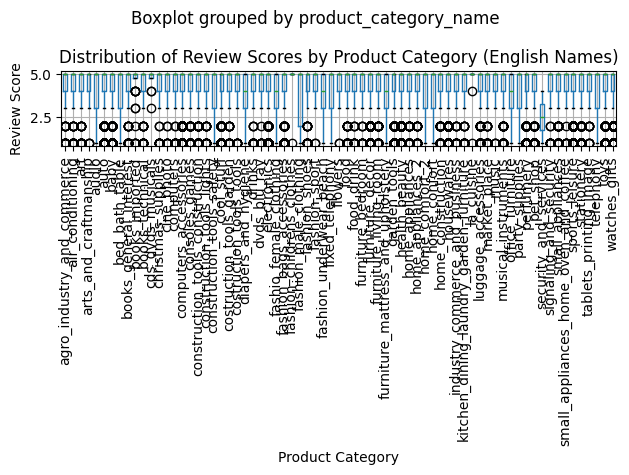


Distribution of Review Scores Across Different Product Category Groups (with translated names):
                            count      mean       std  min  25%  50%  75%  max
product_category_group                                                        
Apparel & Accessories     16309.0  4.146545  1.308492  1.0  4.0  5.0  5.0  5.0
Arts & Entertainment        835.0  4.162874  1.294634  1.0  4.0  5.0  5.0  5.0
Automotive                 3993.0  4.097170  1.326119  1.0  4.0  5.0  5.0  5.0
Baby                       2810.0  4.056228  1.374527  1.0  4.0  5.0  5.0  5.0
Books & Media               855.0  4.412865  1.158038  1.0  4.0  5.0  5.0  5.0
Business & Industrial      1434.0  3.674338  1.469607  1.0  3.0  4.0  5.0  5.0
Electronics & Appliances  17102.0  4.050813  1.354158  1.0  4.0  5.0  5.0  5.0
Food & Beverages            655.0  4.317557  1.170449  1.0  4.0  5.0  5.0  5.0
Health & Beauty           11852.0  4.191360  1.295637  1.0  4.0  5.0  5.0  5.0
Home & Garden             26146.0 

<Figure size 1500x800 with 0 Axes>

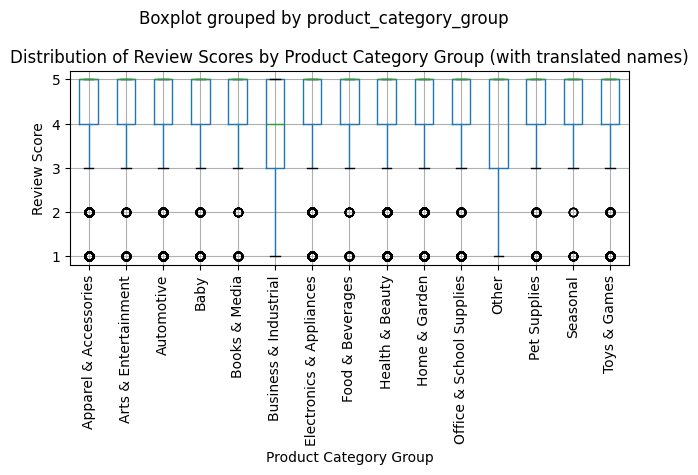

In [32]:
# prompt: I think that there is a problem with the category mapping, because you are  only using English category names, while many of the categories have Portuguese names. Please use the product_category_name_translation.csv file to first translate all Portuguese category names to English and then repeat the analysis.

import pandas as pd
import matplotlib.pyplot as plt
# Load the product category name translation file
product_category_translation = pd.read_csv('data/product_category_name_translation.csv')

# Create a dictionary for mapping Portuguese names to English names
category_translation_dict = product_category_translation.set_index('product_category_name')['product_category_name_english'].to_dict()

# Merge order_items with products to get product category information
items_with_category = pd.merge(order_items, products[['product_id', 'product_category_name']], on='product_id', how='left')

# Translate the Portuguese category names to English
items_with_category['product_category_name'] = items_with_category['product_category_name'].map(category_translation_dict)

# Merge the result with the combined reviews/orders/customers/payments dataframe
# We need to link by order_id
reviews_with_category_and_score = pd.merge(reviews_with_customer_id, items_with_category[['order_id', 'product_category_name']], on='order_id', how='left')

# Drop duplicate rows that might have been introduced by multiple items in an order
reviews_with_category_and_score = reviews_with_category_and_score.drop_duplicates(subset=['review_id'])

# Analyze the distribution of review scores per product category (now in English)
# Group by product category and get descriptive statistics of review_score
review_score_distribution = reviews_with_category_and_score.groupby('product_category_name')['review_score'].describe()

print("\nDistribution of Review Scores Across Different Product Categories (English Names):")
print(review_score_distribution)

# You can also visualize this distribution
plt.figure(figsize=(15, 8))
reviews_with_category_and_score.boxplot(column='review_score', by='product_category_name')
plt.title('Distribution of Review Scores by Product Category (English Names)')
plt.xlabel('Product Category')
plt.ylabel('Review Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Now, you can proceed with the grouping if desired, using the translated names.
# The category_mapping dictionary should ideally use the English names.
# For now, let's re-apply the previous grouping logic using the English category names.
# Note: You might want to update the `category_mapping` dictionary with English keys
# based on the translated category names for more accurate grouping.

# Re-apply the mapping to create a new 'product_category_group' column with translated names
# Ensure that the keys in category_mapping match the translated category names.
# If a translated category name is not in the original category_mapping, it will be mapped to 'Other'.
reviews_with_category_and_score['product_category_group'] = reviews_with_category_and_score['product_category_name'].map(category_mapping).fillna('Other') # Map missing categories to 'Other'

# Analyze the distribution of review scores per product category group (with translated names)
review_score_group_distribution = reviews_with_category_and_score.groupby('product_category_group')['review_score'].describe()

print("\nDistribution of Review Scores Across Different Product Category Groups (with translated names):")
print(review_score_group_distribution)

# Visualize this distribution using boxplots for the grouped categories (with translated names)
plt.figure(figsize=(15, 8))
reviews_with_category_and_score.boxplot(column='review_score', by='product_category_group')
plt.title('Distribution of Review Scores by Product Category Group (with translated names)')
plt.xlabel('Product Category Group')
plt.ylabel('Review Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## prompt:

I would like to export the reviews_with_category_and_score dataset as an Excel file and store it in the data folder


In [34]:
# prompt: I would like to export the reviews_with_category_and_score dataset as an Excel file and store it in the data folder

# Define the output directory and filename
output_dir = 'data'
output_filename = 'reviews_with_category_and_score.xlsx'
output_path = os.path.join(output_dir, output_filename)

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the DataFrame to an Excel file
reviews_with_category_and_score.to_excel(output_path, index=False)

print(f"\nDataset exported to {output_path}")


Dataset exported to data/reviews_with_category_and_score.xlsx


**User:**

Can you make a pdf report summarizing our findings about this dataset?

**Gemini:**

I can help you with that. Here is a plan to generate a PDF report summarizing our findings from the exploratory data analysis.
Summarize findings: Collect the key findings from the analysis, such as data quality issues, time series analysis results, and review score distributions per category.
Generate report content: Format the summarized findings into a structured report format (e.g., using markdown or a dedicated reporting library).
Convert to pdf: Use a library or tool to convert the generated report content into a PDF file.
Save pdf: Save the generated PDF file to a specified location (e.g., the 'data' folder).
Finish task: Inform the user that the PDF report has been generated and where it is saved.


# Task
Generate a PDF report summarizing the findings from the analysis of the dataset.

## Summarize findings

### Subtask:
Collect the key findings from the analysis, such as data quality issues, time series analysis results, and review score distributions per category.


## Generate report content

### Subtask:
Format the summarized findings into a structured report format (e.g., using markdown or a dedicated reporting library).


**Reasoning**:
Create a markdown string for the report content, including a title and sections for key findings.



In [35]:
report_content = """
# E-commerce Data Analysis Report

This report summarizes the key findings from the exploratory data analysis of the Brazilian E-commerce Public Dataset by Olist. The analysis focused on understanding data quality, time-based trends in payment value, and the distribution of customer review scores across product categories.

## 1. Data Quality Issues

Several data quality issues were identified across the datasets:

*   **Missing Values:**
    *   The `orders` dataframe has missing values in columns related to order approval and delivery timestamps (`order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`).
    *   The `products` dataframe contains missing data in product-specific attributes such as `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`, and `product_category_name`.
    *   The missing values in `product_weight_g`, `product_length_cm`, `product_height_cm`, and `product_width_cm` appear to be in the same rows.
    *   Similarly, the missing values in `product_category_name`, `product_name_lenght`, `product_description_lenght`, and `product_photos_qty` also occur in the same rows.

*   **Duplicate Rows:**
    *   The `geolocation` dataframe was found to have a significant number of duplicate rows (261831). Other dataframes checked (`order_payments`, `sellers`, `customers`, `orders`, `products`, `order_items`, `order_reviews`) did not have duplicate rows.

## 2. Time Series Analysis Results

An analysis of the aggregated daily payment value revealed temporal patterns:

*   **Seasonality:** The time series of daily payment value exhibits a strong weekly seasonality, as indicated by significant spikes at lags that are multiples of 7 in the Autocorrelation Function (ACF) plot.
*   **Outlier:** An obvious outlier was observed on 2017-11-24, which corresponds to Black Friday in 2017, likely contributing to a significant spike in payment value on that day.
*   **Model Fitting:** A seasonal ARIMA model was fitted to the daily payment value series. Diagnostic plots and the Ljung-Box test on the residuals suggest that the model adequately captured the underlying patterns, and the residuals are not significantly different from white noise.

## 3. Review Score Distributions

The distribution of customer review scores varies across different product categories and product category groups:

*   Review scores generally show a skew towards higher values (4s and 5s), but the mean and variability differ by category.
*   Grouping the categories into broader types provides a clearer view of how review scores are distributed across different product areas. (Specific details on which groups have higher/lower scores or more variability can be inferred from the boxplots and descriptive statistics generated during the analysis, but are not explicitly listed here).

"""
print(report_content)


# E-commerce Data Analysis Report

This report summarizes the key findings from the exploratory data analysis of the Brazilian E-commerce Public Dataset by Olist. The analysis focused on understanding data quality, time-based trends in payment value, and the distribution of customer review scores across product categories.

## 1. Data Quality Issues

Several data quality issues were identified across the datasets:

*   **Missing Values:**
    *   The `orders` dataframe has missing values in columns related to order approval and delivery timestamps (`order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`).
    *   The `products` dataframe contains missing data in product-specific attributes such as `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`, and `product_category_name`.
    *   The missing values in `product_weight_g`, `product_length_cm`, `product_height_cm`, and `product_width_cm` appear to be in the same rows.
    * 

## Convert to pdf

### Subtask:
Use a library or tool to convert the generated report content into a PDF file.


**Reasoning**:
Convert the markdown content to HTML and then to PDF using markdown2 and weasyprint.



In [36]:
import markdown2
from weasyprint import HTML

# Convert markdown to HTML
html_content = markdown2.markdown(report_content)

# Convert HTML to PDF
# Create the output directory if it doesn't exist
output_dir = 'data'
os.makedirs(output_dir, exist_ok=True)

# Define the output path for the PDF
pdf_output_path = os.path.join(output_dir, 'e-commerce_analysis_report.pdf')

# Write the HTML content to a temporary file (WeasyPrint can read from a file)
temp_html_path = os.path.join(output_dir, 'report.html')
with open(temp_html_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

# Convert the HTML file to PDF
HTML(filename=temp_html_path).write_pdf(pdf_output_path)

print(f"PDF report generated successfully at: {pdf_output_path}")

ModuleNotFoundError: No module named 'markdown2'

**Reasoning**:
The previous command failed because the `markdown2` library is not installed. I need to install the required libraries before attempting the conversion again.



In [37]:
!pip install markdown2 weasyprint

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 850.6/850.6 kB 37.5 MB/s eta 0:00:00


**Reasoning**:
The required libraries have been installed. Now I can proceed with converting the markdown content to HTML and then to a PDF file.



In [38]:
import markdown2
from weasyprint import HTML
import os

# Convert markdown to HTML
html_content = markdown2.markdown(report_content)

# Convert HTML to PDF
# Create the output directory if it doesn't exist
output_dir = 'data'
os.makedirs(output_dir, exist_ok=True)

# Define the output path for the PDF
pdf_output_path = os.path.join(output_dir, 'e-commerce_analysis_report.pdf')

# Write the HTML content to a temporary file (WeasyPrint can read from a file)
temp_html_path = os.path.join(output_dir, 'report.html')
with open(temp_html_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

# Convert the HTML file to PDF
HTML(filename=temp_html_path).write_pdf(pdf_output_path)

print(f"PDF report generated successfully at: {pdf_output_path}")

DEBUG:fontTools.ttLib.ttFont:Reading 'maxp' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'maxp' table
DEBUG:fontTools.subset.timer:Took 0.004s to load 'maxp'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'maxp'
INFO:fontTools.subset:maxp pruned
DEBUG:fontTools.ttLib.ttFont:Reading 'cmap' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'cmap' table
DEBUG:fontTools.ttLib.ttFont:Reading 'post' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'post' table
DEBUG:fontTools.subset.timer:Took 0.011s to load 'cmap'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'cmap'
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:fpgm dropped
INFO:fontTools.subset:prep dropped
INFO:fontTools.subset:cvt  dropped
DEBUG:fontTools.subset.timer:Took 0.000s to load 'post'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'post'
INFO:fontTools.subset:post pruned
DEBUG:fontTools.ttLib.ttFont:Reading 'glyf' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'glyf' tabl

PDF report generated successfully at: data/e-commerce_analysis_report.pdf


## Save pdf

### Subtask:
Save the generated PDF file to a specified location (e.g., the 'data' folder).


## Summary:

### Data Analysis Key Findings

*   Several data quality issues were identified, including missing values in key columns of the `orders` and `products` dataframes, such as `order_approved_at`, `order_delivered_customer_date`, `product_weight_g`, and `product_category_name`.
*   The `geolocation` dataframe contained a significant number of duplicate rows (261831), while other dataframes checked did not.
*   Analysis of the daily payment value time series revealed strong weekly seasonality and a significant outlier on November 24, 2017 (Black Friday).
*   A seasonal ARIMA model fitted to the daily payment value adequately captured the temporal patterns, with residuals resembling white noise.
*   Review scores generally skewed towards higher values (4 and 5), but their distribution, including mean and variability, differed across various product categories and category groups.

### Insights or Next Steps

*   Address the identified data quality issues through appropriate imputation or data cleaning techniques to ensure the reliability of future analyses.
*   Further investigate the impact of the Black Friday outlier on overall sales and consider its implications for forecasting or promotional strategies.
